# Comment on the "Prediction of the SYM-H Index Using a Bayesian Deep Learning Method with Uncertainty Quantification" paper

In [1]:
%cd SYMHnet

/media/isg/DATA/SYMHnet-comment/SYMHnet


In [2]:
!mkdir comment_figures

mkdir: cannot create directory ‘comment_figures’: File exists


In [3]:
# Import necessary libraries for data manipulation and visualization
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as msem
from matplotlib.dates import HourLocator, DateFormatter

## Reading the original data and the predictions csvs

In [4]:
data_dfs = []  # List to hold original data DataFrames
results_dfs = []  # List to hold prediction results DataFrames

# Loop through files in the 'data' directory to read original storm data
for subdir, dirs, files in os.walk('./data'):
    for file in files:
        # Skipping unnecessary files
        if file.find('_list') >= 0 or file.find('storms_data') < 0:
            continue
        if file.endswith('.csv'):  # Ensuring we only read CSV files
            file_path = os.path.join(subdir, file)
            print(f'Reading CSV file at: {file_path}')
            # Read the .csv file using pandas
            df = pd.read_csv(file_path)
            # Converting 'Timestamp' column to datetime and setting it as index
            df['datetime'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d-%H-%M')
            df = df.set_index('datetime')
            # Dropping unnecessary columns
            df = df.drop(columns=['Timestamp', 'YEAR', 'DOY', 'HR', 'MN'])
            # Appending the DataFrame to the list
            data_dfs.append((file_path, df.copy()))

# Loop through files in the 'results_datasets' directory to read prediction results
for subdir, dirs, files in os.walk('./results_datasets'):
    for file in files:
        if file.endswith('.csv'):  # Ensuring we only read CSV files
            file_path = os.path.join(subdir, file)
            print(f'Reading CSV file at: {file_path}')
            df = pd.read_csv(file_path)
            df = df.set_index('Date')
            df = df[['Actual', 'Prediction']]  # Keeping only 'Actual' and 'Prediction' columns
            df.index = pd.to_datetime(df.index)  # Converting index to datetime
            results_dfs.append((file_path, df.copy()))

Reading CSV file at: ./data/solar_wind_symh_1min/1h/storms_data_1h.csv
Reading CSV file at: ./data/solar_wind_symh_1min/1h/28/storms_data_1h.csv
Reading CSV file at: ./data/solar_wind_symh_1min/1h/39/storms_data_1h.csv
Reading CSV file at: ./data/solar_wind_symh_1min/1h/27/storms_data_1h.csv
Reading CSV file at: ./data/solar_wind_symh_1min/1h/31/storms_data_1h.csv
Reading CSV file at: ./data/solar_wind_symh_1min/1h/37/storms_data_1h.csv
Reading CSV file at: ./data/solar_wind_symh_1min/1h/38/storms_data_1h.csv
Reading CSV file at: ./data/solar_wind_symh_1min/1h/40/storms_data_1h.csv
Reading CSV file at: ./data/solar_wind_symh_1min/1h/26/storms_data_1h.csv
Reading CSV file at: ./data/solar_wind_symh_1min/1h/33/storms_data_1h.csv
Reading CSV file at: ./data/solar_wind_symh_1min/1h/34/storms_data_1h.csv
Reading CSV file at: ./data/solar_wind_symh_1min/1h/35/storms_data_1h.csv
Reading CSV file at: ./data/solar_wind_symh_1min/1h/42/storms_data_1h.csv
Reading CSV file at: ./data/solar_wind_sy

### Plotting the 1 hour ahead forecasts
We compare the SYM-H data from the original data in the ``data`` folder to the predictions in the ``results_datasets`` folder.
In the plots, the predictions have the incorrect dates, the SYM-H peak on both the original data and the predictions is marked with a dashed vertical line, and the dates of such peaks are printed

Analyzing for storm 28
Original storm data from ./data/solar_wind_symh_1min/1h/28/storms_data_1h.csv
SYM-H peak of -111 at 1999-01-13 23:36:00
Results data from ./results_datasets/storm_num_28/1min/1h_uq_training.csv
SYM-H peak of -111.0 at 1999-01-12 19:01:00


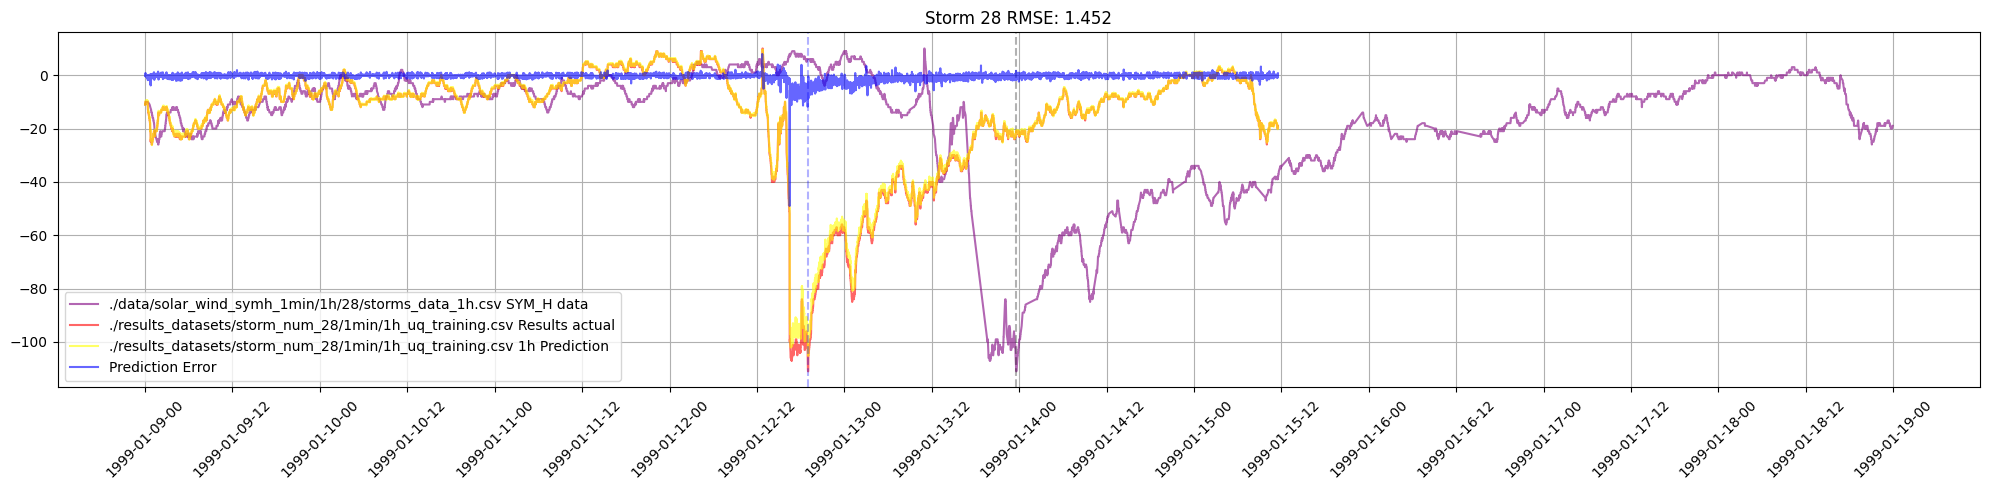

Time difference: 1 days 04:35:00
Analyzing for storm 31
Original storm data from ./data/solar_wind_symh_1min/1h/31/storms_data_1h.csv
SYM-H peak of -320 at 2000-04-07 00:09:00
Results data from ./results_datasets/storm_num_31/1min/1h_uq_training.csv
SYM-H peak of -320.0 at 2000-04-06 11:07:00


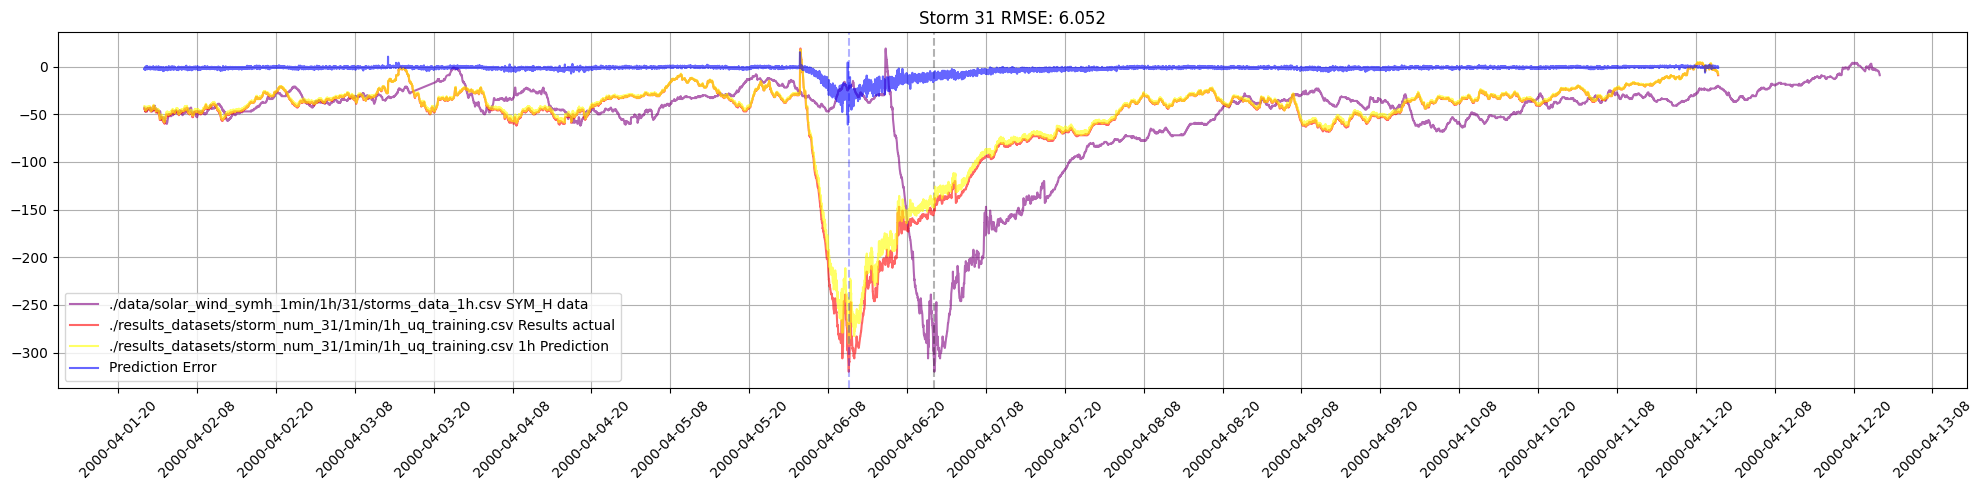

Time difference: 0 days 13:02:00
Analyzing for storm 33
Original storm data from ./data/solar_wind_symh_1min/1h/33/storms_data_1h.csv
SYM-H peak of -437 at 2001-03-31 08:06:00
Results data from ./results_datasets/storm_num_33/1min/1h_uq_training.csv
SYM-H peak of -437.0 at 2001-03-30 17:03:00


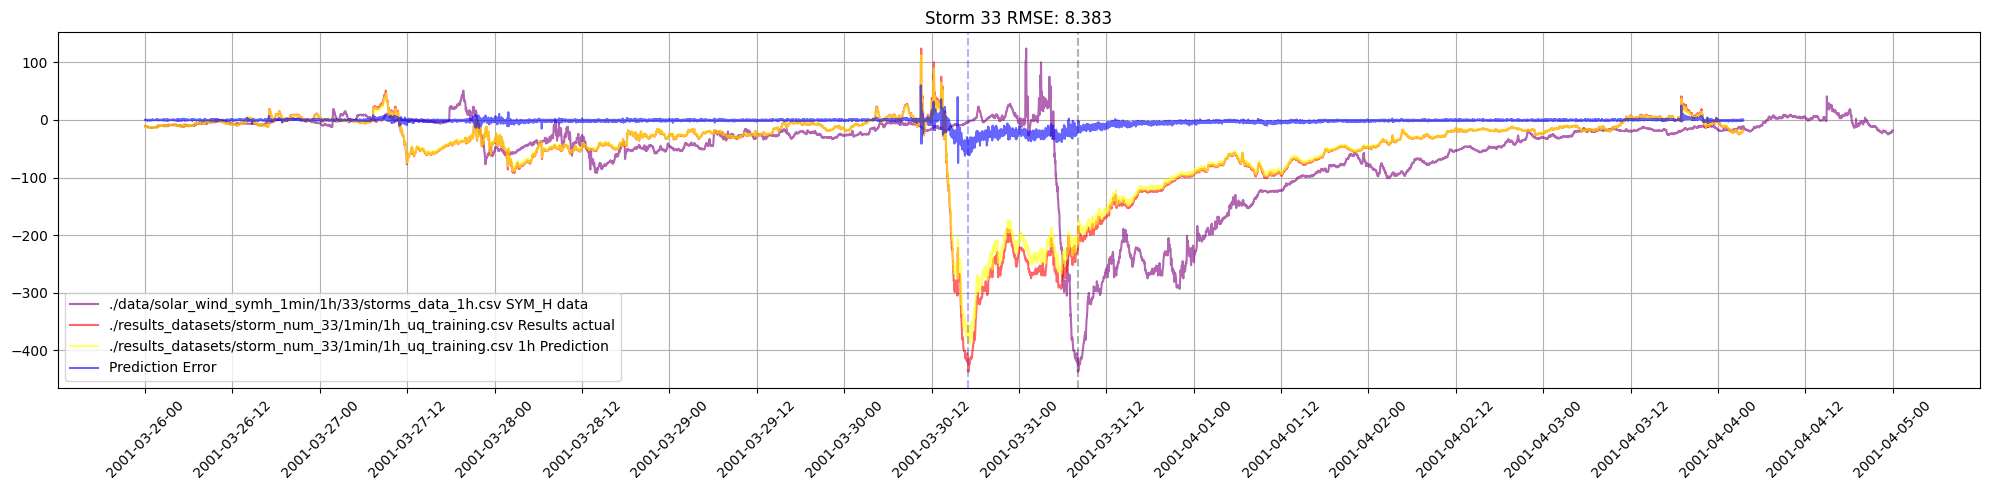

Time difference: 0 days 15:03:00
Analyzing for storm 36
Original storm data from ./data/solar_wind_symh_1min/1h/36/storms_data_1h.csv
SYM-H peak of -137 at 2004-01-22 13:25:00
Results data from ./results_datasets/storm_num_36/1min/1h_uq_training.csv
SYM-H peak of -137.0 at 2004-01-21 23:16:00


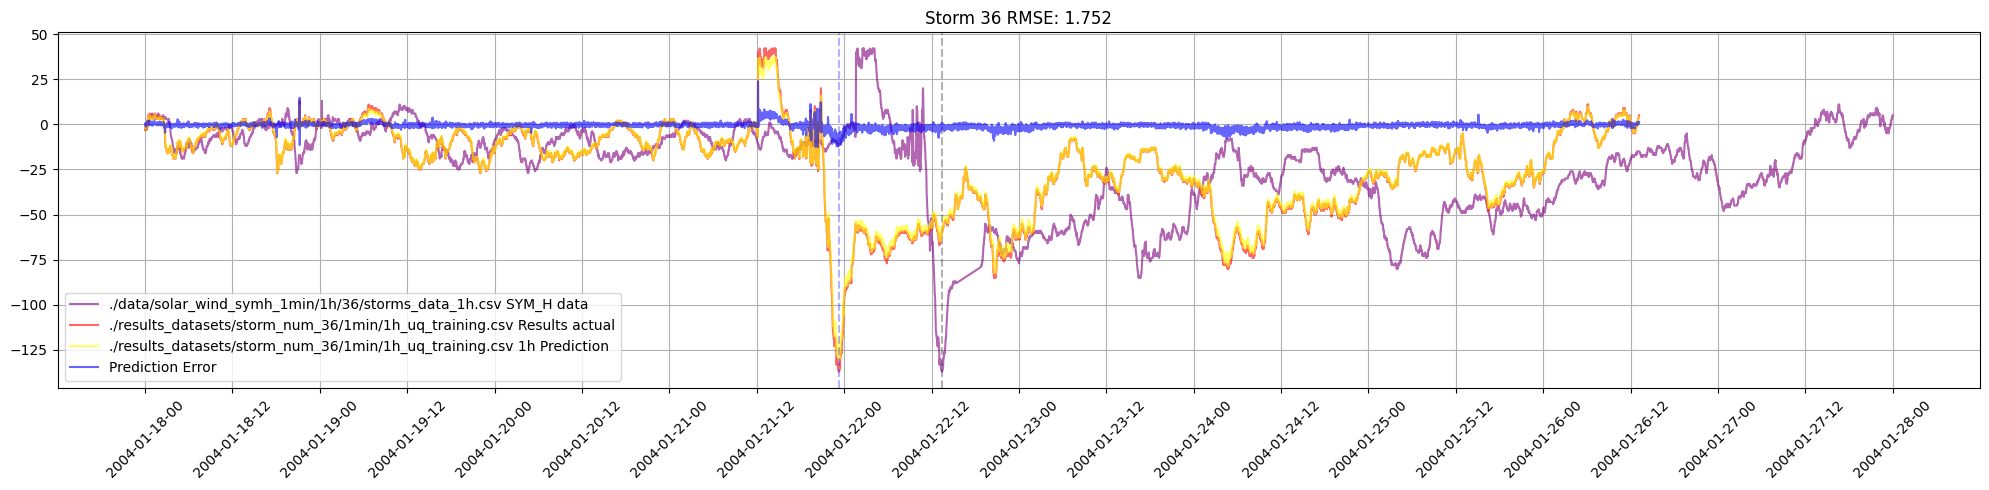

Time difference: 0 days 14:09:00
Analyzing for storm 37
Original storm data from ./data/solar_wind_symh_1min/1h/37/storms_data_1h.csv
SYM-H peak of -394 at 2004-11-08 05:55:00
Results data from ./results_datasets/storm_num_37/1min/1h_uq_training.csv
SYM-H peak of -394.0 at 2004-11-07 12:36:00


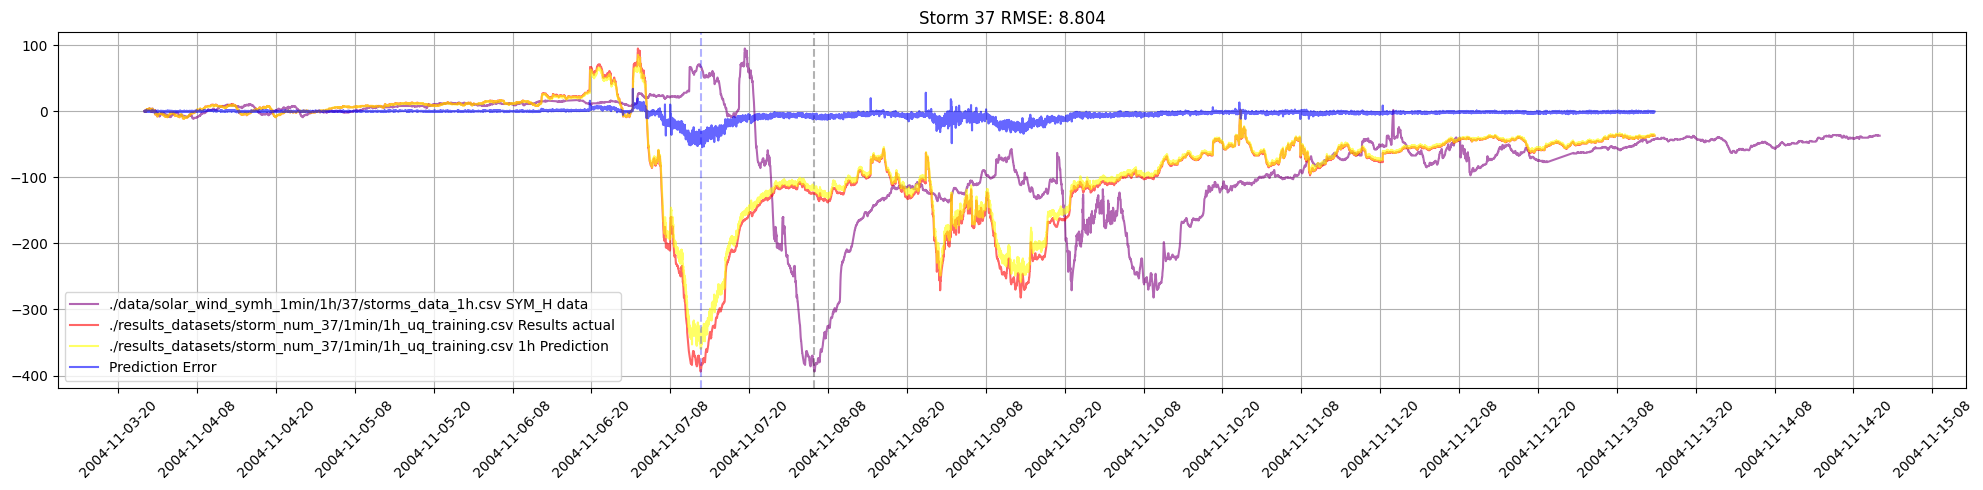

Time difference: 0 days 17:19:00
Analyzing for storm 40
Original storm data from ./data/solar_wind_symh_1min/1h/40/storms_data_1h.csv
SYM-H peak of -111 at 2013-06-29 06:34:00
Results data from ./results_datasets/storm_num_40/1min/1h_uq_training.csv
SYM-H peak of -111.0 at 2013-06-28 20:03:00


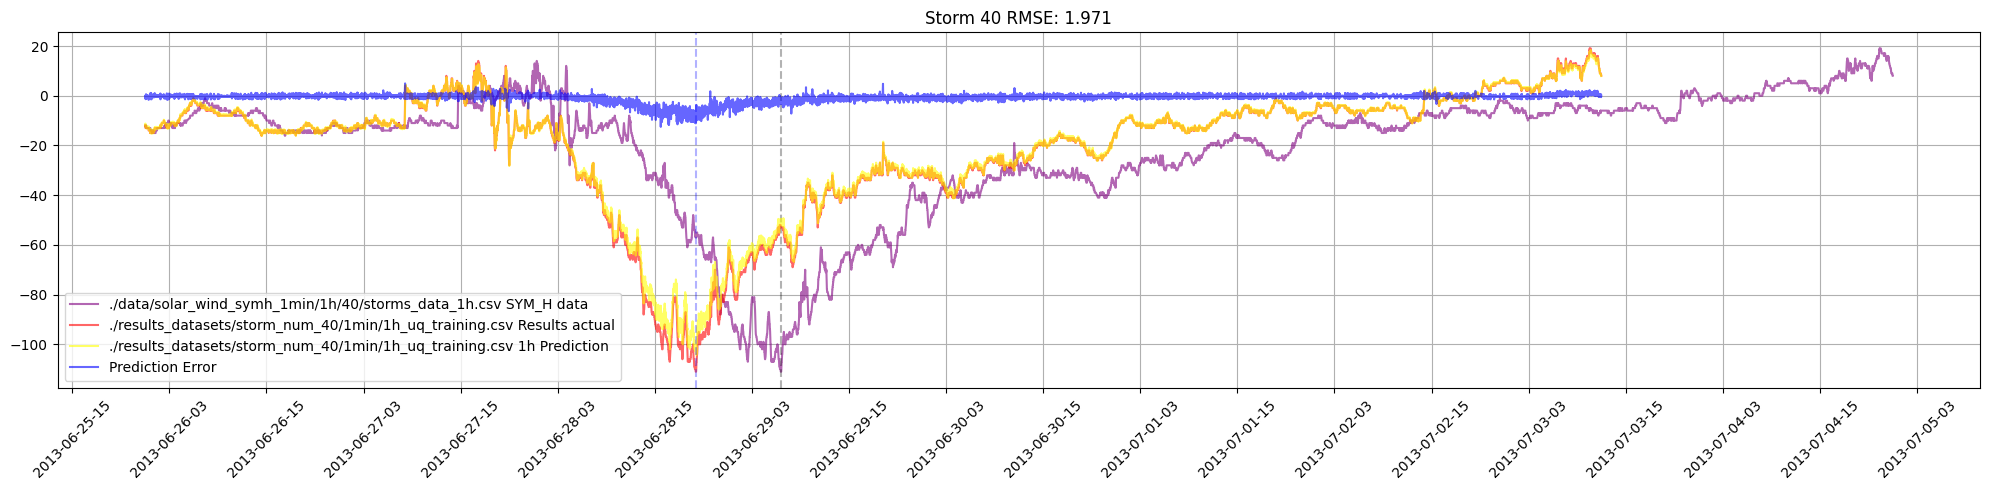

Time difference: 0 days 10:31:00
Analyzing for storm 42
Original storm data from ./data/solar_wind_symh_1min/1h/42/storms_data_1h.csv
SYM-H peak of -206 at 2018-08-26 07:11:00
Results data from ./results_datasets/storm_num_42/1min/1h_uq_training.csv
SYM-H peak of -206.0 at 2018-08-25 11:32:00


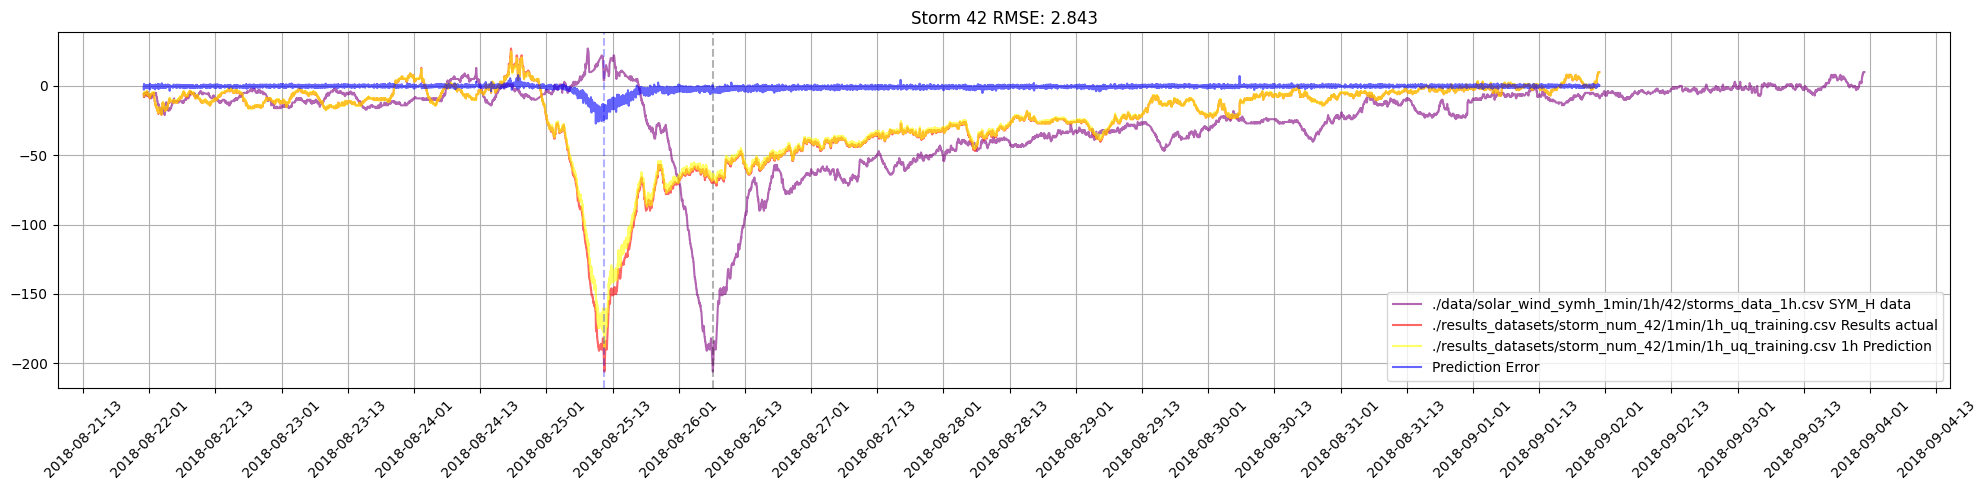

Time difference: 0 days 19:39:00


In [5]:
results_storms = [28, 31, 33, 36, 37, 40, 42]  # List of storms to analyze

for storm_index in results_storms:
    print(f'Analyzing for storm {storm_index}')
    fig, ax = plt.subplots(1, 1, figsize=(20, 5))  # Setting up the plot
    # Loop through the original data to find the matching storm data and plot it
    for df_index, (df_name_orig, df_orig) in enumerate(data_dfs):
        if df_name_orig.find(str(storm_index)) >= 0 and df_name_orig.find('storms_data_1h.csv') >= 0 and df_name_orig.find('_1min') >= 0:
            print(f'Original storm data from {df_name_orig}')
            ax.plot(df_orig.index,
                    df_orig['SYM_H'],
                    color = 'purple', alpha = 0.6, label = f'{df_name_orig} SYM_H data')
            # Marking the SYM-H peak with a dashed vertical line
            ax.axvline(df_orig['SYM_H'].idxmin(), color = 'black', alpha = 0.3, linestyle = '--')
            print(f"SYM-H peak of {df_orig['SYM_H'].min()} at {df_orig['SYM_H'].idxmin()}")
            break

    # Loop through the prediction results to find the matching storm data
    for df_index, (df_name_pred, df_pred) in enumerate(results_dfs):
        if df_name_pred.find(str(storm_index)) >= 0 and df_name_pred.find('1min/1h_uq_training.csv') >= 0:
            print(f'Results data from {df_name_pred}')
            ax.plot(df_pred.index,
                   df_pred['Actual'],
                   color = 'red', alpha = 0.6, label = f'{df_name_pred} Results actual')

            ax.plot(df_pred.index,
                   df_pred['Prediction'],
                   color = 'yellow', alpha = 0.6, label = f'{df_name_pred} 1h Prediction')
            # Marking the actual SYM-H peak with a dashed vertical line
            ax.axvline(df_pred['Actual'].idxmin(), color = 'blue', alpha = 0.3, linestyle = '--')
                # Calculating and displaying the Root Mean Square Error (RMSE) between actual and predicted values
            rmse = msem(df_pred['Actual'], df_pred['Prediction'], squared = False)
            ax.plot(df_pred.index,
                    df_pred['Actual'] - df_pred['Prediction'], color = 'blue',
                    alpha = 0.6, label = 'Prediction Error')
            ax.set_title(f'Storm {storm_index} RMSE: {rmse:.3f}')
            print(f"SYM-H peak of {df_pred['Actual'].min()} at {df_pred['Actual'].idxmin()}")
            break

    ax.legend()  # Displaying the legend to identify each plot line
    ax.grid(True)  # Adding a grid for better readability
    ax.xaxis.set_major_locator(HourLocator(interval=12))  # Setting major ticks on the x-axis every 12 hours
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d-%H'))  # Formatting the date display on the x-axis
    ax.tick_params(axis='x', rotation=45)  # Rotating x-axis labels for better readability
    plt.tight_layout()  # Adjusting the layout to prevent overlap
    # Saving the figure to a file
    plt.savefig(f'comment_figures/storm_{storm_index}_1h_comparison_data_results.png', transparent=True)
    plt.show()  # Displaying the plot
    print(f"Time difference: {df_orig['SYM_H'].idxmin() - df_pred['Actual'].idxmin()}")


### Plotting the 1 and 2 hours ahead forecasts
There is only 2h hours ahead forecast data from two storms, 36 and 37, so we plot them and compare the dates with both the original ones and the 1 hour ahead forecast.
* For the storm 36, despite being in the 1minute folder, the data is on 5 minutes intervals, so they can't be directly compared.
* For the storm 37, there is only data around the peak, and once again, the time values are all different for the original data, the 1 hour and the 2 hours ahead forecast


Comparison 1 and 2 hours data
Analyzing for storm 36
Original storm data from ./data/solar_wind_symh_1min/1h/36/storms_data_1h.csv, dataframe len 12312, Start date: 2004-01-18 00:00:00 end date: 2004-01-27 23:59:00
Resolution: 0 days 00:01:00
SYM-H peak of -137 at 2004-01-22 13:25:00
Results data from ./results_datasets/storm_num_36/1min/2h_uq_training.csv, dataframe len 12311, Start date: 2004-01-18 00:00:00 end date: 2004-02-29 17:50:00
Resolution: 0 days 00:05:00
SYM-H peak of -137.0 at 2004-02-06 20:20:00
Time difference: -16 days +17:05:00
Results data from ./results_datasets/storm_num_36/1min/1h_uq_training.csv, dataframe len 12311, Start date: 2004-01-18 00:00:00 end date: 2004-01-26 13:10:00
Resolution: 0 days 00:01:00
SYM-H peak of -137.0 at 2004-01-21 23:16:00
Time difference: 0 days 14:09:00


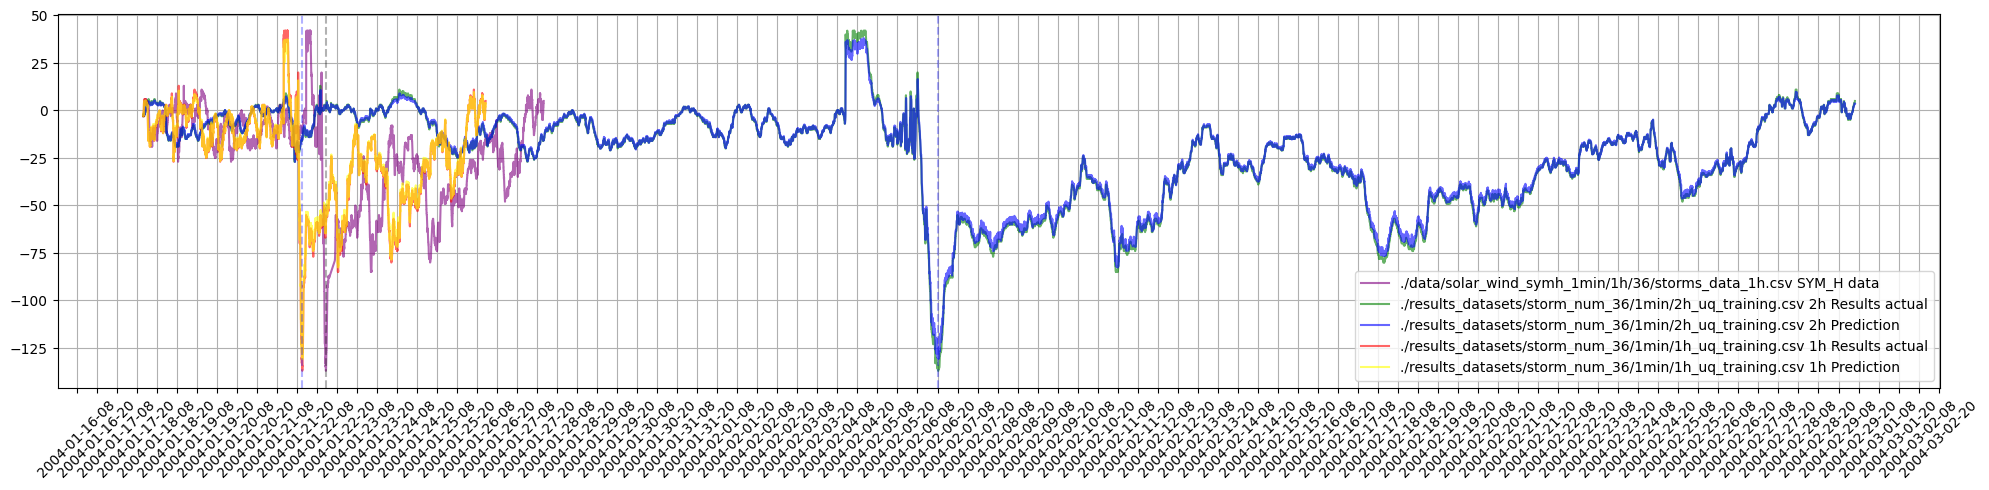

Analyzing for storm 37
Original storm data from ./data/solar_wind_symh_1min/1h/37/storms_data_1h.csv, dataframe len 13786, Start date: 2004-11-04 00:00:00 end date: 2004-11-14 23:59:00
Resolution: 0 days 00:01:00
SYM-H peak of -394 at 2004-11-08 05:55:00
Results data from ./results_datasets/storm_num_37/1min/2h_uq_training.csv, dataframe len 1993, Start date: 2004-11-07 00:00:00 end date: 2004-11-08 09:12:00
Resolution: 0 days 00:01:00
SYM-H peak of -394.0 at 2004-11-07 15:48:00
Time difference: 0 days 14:07:00
Results data from ./results_datasets/storm_num_37/1min/1h_uq_training.csv, dataframe len 13785, Start date: 2004-11-04 00:00:00 end date: 2004-11-13 13:44:00
Resolution: 0 days 00:01:00
SYM-H peak of -394.0 at 2004-11-07 12:36:00
Time difference: 0 days 17:19:00


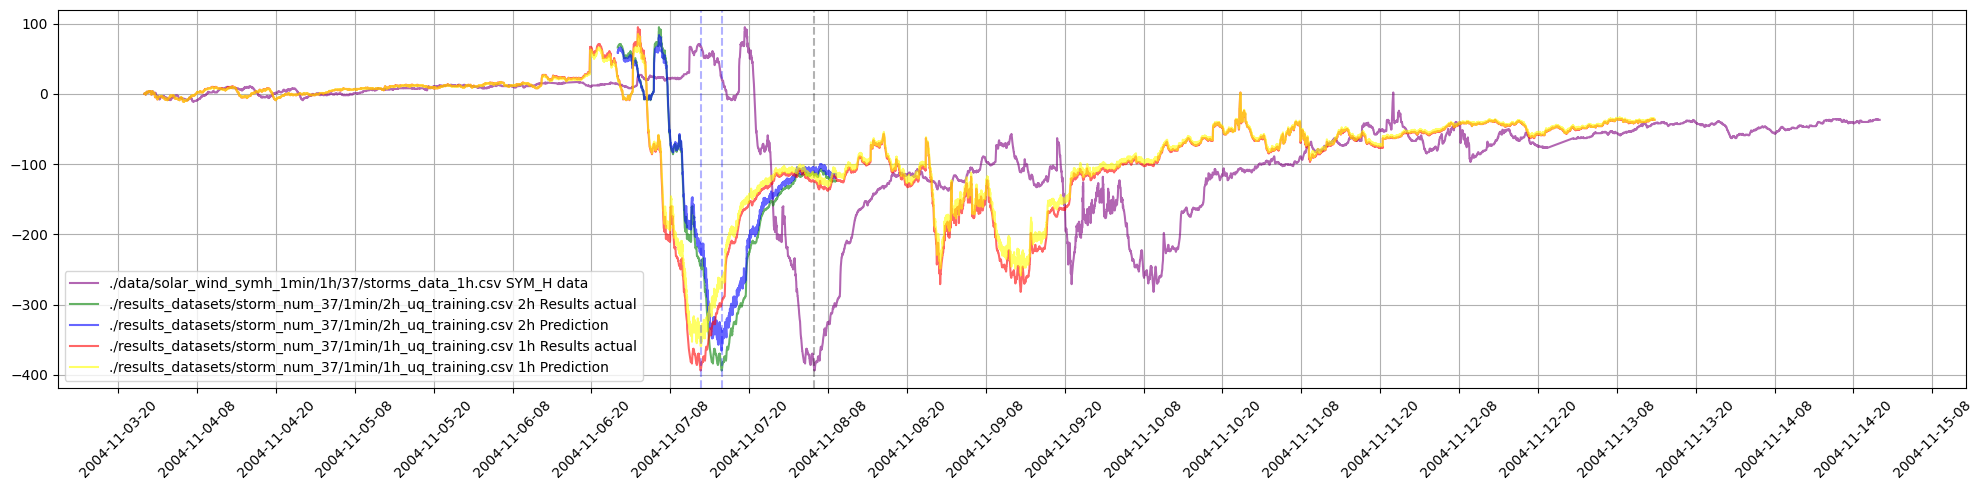

In [6]:
print('Comparison 1 and 2 hours data')
storms_2h =[36, 37] # List of storms to analyze
for storm_index in storms_2h:
    print(f'Analyzing for storm {storm_index}')
    title = ''
    fig, ax = plt.subplots(1, 1, figsize=(20, 5))  # Setting up the plot
    # Loop through the original data to find the matching storm data and plot it
    for df_index, (df_name_orig, df_orig) in enumerate(data_dfs):
        if df_name_orig.find(str(storm_index)) >= 0 and df_name_orig.find('storms_data_1h.csv') >= 0 and df_name_orig.find('_1min') >= 0:
            print(f'Original storm data from {df_name_orig}, dataframe len {len(df_orig)}, Start date: {df_orig.index[0]} end date: {df_orig.index[-1]}')
            # Substract the date at subsequent timesteps to infer the time resolution
            print(f'Resolution: {df_orig.index[1] - df_orig.index[0]}')
            # Plot the original data
            ax.plot(df_orig.index,
                    df_orig['SYM_H'],
                    color = 'purple', alpha = 0.6, label = f'{df_name_orig} SYM_H data')
            # Marking the SYM-H peak with a dashed vertical line
            ax.axvline(df_orig['SYM_H'].idxmin(), color = 'black', alpha = 0.3, linestyle = '--')
            real_min = df_orig['SYM_H'].idxmin()
            # Print information about the peak, the index value and the date
            print(f"SYM-H peak of {df_orig['SYM_H'].min()} at {df_orig['SYM_H'].idxmin()}")
            break

    # Loop through the prediction results to find the matching storm data, in this case the 2h data
    for df_index, (df_name_pred_2h, df_pred_2h) in enumerate(results_dfs):
        if df_name_pred_2h.find(str(storm_index)) >= 0 and df_name_pred_2h.find('1min/2h_uq_training.csv') >= 0:
            print(f'Results data from {df_name_pred_2h}, dataframe len {len(df_pred_2h)}, Start date: {df_pred_2h.index[0]} end date: {df_pred_2h.index[-1]}')
            print(f'Resolution: {df_pred_2h.index[1] - df_pred_2h.index[0]}')
            ax.plot(df_pred_2h.index,
                    df_pred_2h['Actual'],
                    color = 'green', alpha = 0.6, label = f'{df_name_pred_2h} 2h Results actual')

            ax.plot(df_pred_2h.index,
                df_pred_2h['Prediction'],
                color = 'blue', alpha = 0.6, label = f'{df_name_pred_2h} 2h Prediction')
            # Marking the actual SYM-H peak with a dashed vertical line
            ax.axvline(df_pred_2h['Actual'].idxmin(), color = 'blue', alpha = 0.3, linestyle = '--')
            # Calculating and displaying the Root Mean Square Error (RMSE) between actual and predicted values
            rmse = msem(df_pred_2h['Actual'], df_pred_2h['Prediction'], squared = False)
            title += f'Storm {storm_index} 2 hours ahead RMSE: {rmse:.3f}\n'
            print(f"SYM-H peak of {df_pred_2h['Actual'].min()} at {df_pred_2h['Actual'].idxmin()}")
            print(f"Time difference: {real_min - df_pred_2h['Actual'].idxmin()}")
            break

    # Loop through the prediction results to find the matching storm data, in this case the 1h data
    for df_index, (df_name_pred_1h, df_pred_1h) in enumerate(results_dfs):
        if df_name_pred_1h.find(str(storm_index)) >= 0 and df_name_pred_1h.find('1min/1h_uq_training.csv') >= 0:
            print(f'Results data from {df_name_pred_1h}, dataframe len {len(df_pred_1h)}, Start date: {df_pred_1h.index[0]} end date: {df_pred_1h.index[-1]}')
            print(f'Resolution: {df_pred_1h.index[1] - df_pred_1h.index[0]}')
            ax.plot(df_pred_1h.index,
                    df_pred_1h['Actual'],
                    color = 'red', alpha = 0.6, label = f'{df_name_pred_1h} 1h Results actual')

            # Marking the actual SYM-H peak with a dashed vertical line
            ax.plot(df_pred_1h.index,
                    df_pred_1h['Prediction'],
                    color = 'yellow', alpha = 0.6, label = f'{df_name_pred_1h} 1h Prediction')
            # Marking the actual SYM-H peak with a dashed vertical line
            ax.axvline(df_pred_1h['Actual'].idxmin(), color = 'blue', alpha = 0.3, linestyle = '--')
            # Calculating and displaying the Root Mean Square Error (RMSE) between actual and predicted values
            rmse = msem(df_pred_1h['Actual'], df_pred_1h['Prediction'], squared = False)
            title += f'Storm {storm_index} 1 hour ahead RMSE: {rmse:.3f}'
            print(f"SYM-H peak of {df_pred_1h['Actual'].min()} at {df_pred_1h['Actual'].idxmin()}")
            print(f"Time difference: {real_min - df_pred_1h['Actual'].idxmin()}")
            break

    ax.legend()  # Displaying the legend to identify each plot line
    ax.grid(True)  # Adding a grid for better readability
    ax.xaxis.set_major_locator(HourLocator(interval=12))  # Setting major ticks on the x-axis every 12 hours
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d-%H'))  # Formatting the date display on the x-axis
    ax.tick_params(axis='x', rotation=45)  # Rotating x-axis labels for better readability
    plt.tight_layout()  # Adjusting the layout to prevent overlap
    # Saving the figure to a file
    plt.savefig(f'comment_figures/storm_{storm_index}_1h_2h_comparison_data_results.png', transparent=True)
    plt.show();

## Model loading
Here we can see that the model only takes as input one time-step of data and 11 features, while on the paper they indicate that the model takes 8 features and 10 timesteps

```
[(None, 1, 11, 1)]
  |     |   |  ^ Features channels
  |     |   ^ Features
  |     ^ Timesteps
  ^ Batch dimension
```

In [7]:
import tensorflow as tf
# Import the model and plot the summary
model = tf.keras.models.load_model('./models_storms_1min/1h_symh/model_weights_full')
model.summary()

2024-02-29 12:23:52.548196: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-29 12:23:52.566937: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 12:23:52.566960: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 12:23:52.566977: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-29 12:23:52.571106: I tensorflow/core/platform/cpu_feature_g

2024-02-29 12:23:53.408765: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-29 12:23:53.411544: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-29 12:23:53.411648: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 11, 1)]        0         
                                                                 
 bi_lstmgnn (BiLSTMGNN)      (None, 3, 11)             354813    
                                                                 
Total params: 354813 (1.35 MB)
Trainable params: 354813 (1.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


This cell is similar to the ``SYMHnet_test.py `` file. With slight modifications to return the input data that is fed to the network, the dates, names of the storm, the labels and the predictions for posterior analysis.
The sections that have been modified are wrapped around with
```
### MOD: reason of the modification
modifications
### END MOD
```
Addtionally, we have replaced the ``log`` calls with ``display`` since we are not using a log file in this notebook.
In this link all the diferences can be observed: https://www.diffchecker.com/lGtAdtCk/

In [8]:
from SYMHnet_utils import *
from SYMHnet_dataset import *

num_hours = 1
interval_type = 'hourly'
epochs = 100
w_dir=None
is_small=True
figsize=(7,3)
resolution_minutes=1
view_type = ''

def test(storm_to_test,
         start_hour,
         end_hour,
         resolution_minutes=1,
         do_pred_error=False,
         view_type = '',
         jupyter_enabled=False):
    figure_names = []
    fig_ax = None
    global figsize
    res = ''
    if resolution_minutes == 1:
        res = ''
    else:
        res = '_5min'

    if is_small:
        figsize=(5,2.2)

    display('Starting the training for start_hour:', start_hour, 'end_hour:', end_hour )
    storms_data = pd.read_csv('data'+os.sep  +'storms_list.csv')
    storm_years = list(storms_data['Start date'].values)
    storm_years.extend(list(storms_data['End date'].values))
    storm_years = [int(format_date_filter(s).split('-')[0]) for s in storm_years]
    storm_years = list(set(storm_years))
    storm_years.sort()

    test_storms = storms_data.loc[storms_data['Storm no.']>= 26].reset_index()
    test_range = get_range_from_data(test_storms)
    display('test_range:', test_range)

    test_storm_years = list(test_storms['Start date'].values)
    test_storm_years.extend(list(test_storms['End date'].values))
    test_storm_years = [int(format_date_filter(s).split('-')[0]) for s in test_storm_years]
    test_storm_years = list(set(test_storm_years))
    test_storm_years.sort()
    display('test_years:', test_storm_years)
    fig = None
    ax = None

    ### MOD preparing lists for the data that will be returned
    _x_test = []
    _y_test = []
    _predictions_ft = []
    _ax_dates = []
    _names = []
    ### END_MOD
    for k in range(start_hour,end_hour):
        if jupyter_enabled and  k == 1:
            fig, ax = plt.subplots(1, 2,figsize=figsize)
        postfix = '_' + str(resolution_minutes) + 'min'
        data_dir_to_save = 'data' + os.sep + 'solar_wind_symh_' + str(resolution_minutes) + 'min' + os.sep + str(k) + 'h'
        os.makedirs(data_dir_to_save, exist_ok=True)
        epochs = 3
        display('Running testing for storm #' +str(storm_to_test) + ' for ', str(k) +'-hour ahead for', str(resolution_minutes)  +'-minute resolution')
        num_hours = k
        dataset = SYMHnetDataset(num_hours=num_hours, columns_names=columns_names)
        rows, cols = (len(columns_names), len(columns_names))
        arr = [[1 for i in range(cols)] for j in range(rows)]
        route_distances = np.array(arr)


        data_dir_to_save = 'data' + os.sep + 'solar_wind_symh' + postfix + os.sep + str(k) + 'h' +  os.sep + str(storm_to_test)
        training_file = data_dir_to_save + os.sep + 'training_data_' + str(k) + 'h.csv'
        train_data =  get_data_from_file(training_file)
        storms_file = data_dir_to_save + os.sep + 'storms_data_' + str(k) + 'h.csv'
        storms_data =  get_data_from_file(storms_file)
        d = [train_data, storms_data]
        validation_file = data_dir_to_save + os.sep + 'validation_data_' + str(k) + 'h.csv'
        validation_data = get_data_from_file(validation_file)

        display('len(train_data):', len(train_data))

        train_array = train_data[columns_names].to_numpy()
        validation_array = validation_data[columns_names].to_numpy()
        display('len(train_array):', len(train_array))

        train_dataset, val_dataset = (
            dataset.create_tf_dataset(data_array)
            for data_array in [train_array, validation_array]
        )
        if k == 1:
            test_storms = test_storms.reset_index()

        res = str(resolution_minutes) + 'min'
        w_dir = 'models_storms_' + res  +os.sep  + str(num_hours) + 'h_' + str(col_name).replace('_','').lower()
        display(f"Loading model at {w_dir + os.sep + 'model_weights_full'}")
        model = keras.models.load_model(w_dir + os.sep + 'model_weights_full')
        ylimit_min=None
        ylimit_max = None
        storm_num = storm_to_test
        i = storm_to_test - 26
        res = str(resolution_minutes) + 'min'
        ### MOD changing output directory to not overwrite the data
        result_data_set_file = 'MOD_results_datasets' + os.sep + 'storm_num_' + str(storm_num) + os.sep + res
        ### ENDMOD
        os.makedirs(result_data_set_file, exist_ok=True)
        ### MOD CHANGE start_hour to num_hours otherwhise it would always save it to a 1h file
        # We save the result_data_set_file as the name of the plot
        result_data_set_file = result_data_set_file + os.sep + str(num_hours) + 'h_uq_training.csv'
        ### ENDMOD
        storm_start = test_storms['Start date'][i]
        storm_end = test_storms['End date'][i]


        t1 = format_date_filter(storm_start)
        t2 =  format_date_filter(storm_end)
        display('t1', t1)
        display('values-->', storm_start, t1, storm_end,t2)
        value = get_range(t1,t2)
        display('value:', value)
        if '_lv' in view_type :
            if storm_to_test == 36:
                if is_intense:
                    value = ['2004-1-22-' + str(n) for n in range(9,21)]
                else:
                    value = ['2004-1-18-' + str(n) for n in range(0,7)]
            if storm_to_test == 37:
                if is_intense:
                    value = ['2004-11-7-' + str(n) for n in range(12,24)]
                    for n in range(0,15):
                        value.append('2004-11-8-' + str(n))
                else:
                    value = ['2004-11-7-' + str(n) for n in range(0,3)]
        display('value 2:', value)
        s_data = storms_data.loc[storms_data['Timestamp'].str.contains('|'.join(value)) ]

        display(storm_num,'storms_data size:', len(storms_data), 's_data size:', len(s_data))
        display(storm_num,'min:',np.array(s_data['SYM_H']).min(),'max:', np.array(s_data['SYM_H']).max())
        max_val = np.array(s_data['SYM_H']).max()
        min_val = np.array(s_data['SYM_H']).min()
        display(storm_num,'range:', value)

        if 'level_0' in s_data.columns:
            s_data = s_data.drop('level_0',axis=1)

        s_data = s_data.reset_index()

        x_dates = get_dates_from_data(s_data)
        s_data = s_data[columns_names].to_numpy()

        ax_dates = []
        start_date = x_dates[0]
        end_date = x_dates[-1]
        start_date_ts = datetime(int(start_date[0]), int(start_date[1]), int(start_date[2]),0,0,0)
        end_date_ts = datetime(int(end_date[0]), int(end_date[1]), int(end_date[2]),0,0,0)

        test_data = s_data
        current_date = start_date_ts
        minutes = resolution_minutes
        #The dates are saved to align the data later
        for c in range(len(test_data)-1):
            ax_dates.append(current_date)
            current_date = current_date + timedelta(minutes=minutes)
        end_date_ts = ax_dates[-1]
        display('end_date_ts:', end_date_ts)

        test_array = s_data
        test_dataset = dataset.create_tf_dataset(
            test_array,
            batch_size=test_array.shape[0]
        )

        x_test, y = next(test_dataset.as_numpy_iterator())
        col_index = len(columns_names)-1

        # This x_test is saved as the input features that are fed to the model
        y_pred = model.predict(x_test)

        y_preds = y_pred[:, 0, col_index]
        # This y_test is saved as the labels that will be used to evaluate later
        y_test = y[:, 0, col_index]

        # The predictions are also saved
        predictions_ft = uncertainty(model, x_test,col_index, N=numberOfSamples)

        y_preds = predictions_ft[0]
        w_dir = 'models_storms_' + str(resolution_minutes) +'min'  +os.sep  + str(num_hours) + 'h_' + str(col_name).replace('_','').lower()
        handler = open(result_data_set_file,'w')
        display('saving to:', result_data_set_file)
        handler.write('Date,Actual,Prediction,Aleatoric,Epistemic\n')
        for z in range(len(y_test)):
            if z == 0:
                handler.write(str(ax_dates[z]) + ',' +  str(y_test[z] ) + ',' + str(y_preds[z]) + ',' + str(predictions_ft[1]) + ',' + str(predictions_ft[2]) + '\n')
            else:
                handler.write(str(ax_dates[z]) + ','+ str(y_test[z] ) + ',' + str(y_preds[z]) + '\n')
        handler.flush()
        handler.close()
        ### MOD add MOD_ to the file name to not overwrite
        file_name_uq ='MOD_figures' + os.sep + 'storm_' +str(res).replace('_','') + '_' + str(storm_num) +'_' + str(num_hours) + interval_type[0] +'_' + str(col_name).replace('_','').lower()  + '_uq' + view_type +'.pdf'
        ### ENDMOD

        l = len(ax_dates)
        display('dates-->', ax_dates[0],ax_dates[(l//4)], ax_dates[(l//4)*2], ax_dates[-1] )
        y_label = str(col_name).replace('_','-') + ' (nT)'
        yticks = None
        if is_small and num_hours in [2,4,6]:
            y_label = ''
            yticks = []
        pred_errors = None
        fill_graph=True
        if do_pred_error:
            fill_graph=False
            pred_errors= []
            for n in range(len(y_test)):
                pred_errors.append(math.floor(((y_test[n] - predictions_ft[0][n]))))
            if len(pred_errors) > 0:
                file_name_uq = file_name_uq.replace(".pdf","_pe.pdf")
            display('Preds stats -->', storm_to_test,res, k, np.array(pred_errors).max() , np.array(pred_errors).min())
        xticks = [ ax_dates[0],ax_dates[(l//3)], ax_dates[(l//3)*2], ax_dates[-1]]
        if storm_num in [28, 31, 33,40,42]:
            ylimit_min=-550
            ylimit_max=150
            xticksvalues = [str(t1) for t1 in xticks]
            if storm_num == 33:
                ylimit_min=-550
                ylimi_max = 150
                xticksvalues=['03/26/01' ,'03/29/01', '04/01/01', '04/04/01']
            if storm_num == 28:
                ylimit_min = int(min_val) - 50
                ylimit_max = int(max_val) + 50
                xticksvalues=['01/09/99' ,'09/07/99', '09/13/99', '09/19/99']
            if storm_num == 31:
                ylimit_min = int(min_val) - 50
                ylimit_max = int(max_val) + 50
                xticksvalues=['04/02/00' ,'04/05/00', '04/08/00', '04/11/00']
            if storm_num == 40:
                ylimit_min = int(min_val) - 50
                ylimit_max = int(max_val) + 50
                xticksvalues=['06/26/13' ,'06/29/13', '07/02/13', '07/05/13']
            if storm_num == 42:
                ylimit_min = -275
                ylimit_max = int(max_val) + 50
                xticksvalues=['08/22/18' ,'08/26/18', '08/30/18', '09/03/18']
            else:
                ylimit_min = int(min_val) - 50
                ylimit_max = int(max_val) + 50
        elif  storm_num in [36]:
                ylimit_min=-170
                ylimit_max=70
                xticksvalues=['01/18/04' ,'01/21/04', '01/24/04', '01/27/04']
                if '_lv' in view_type :
                    if is_intense:
                        xticksvalues=['01/22/04 09:00' ,'01/22/04 12:00', '01/22/04 15:00', '01/22/04 18:00']
                    else:
                        xticksvalues=['01/18/04 0:00' ,'01/18/04 02:00', '01/18/04 04:00', '01/18/04 06:00']

        elif  storm_num in [37]:
                ylimit_min=-170
                ylimit_max=70
                xticksvalues=['11/4/2004' ,'11/7/2004', '11/11/2004', '11/14/2004']
                xticksvalues=['11/04/04' ,'11/07/04', '11/10/04', '11/13/04']
                if '_lv' in view_type :
                    if is_intense:
                        xticksvalues=['11/07/04 21:00' ,'11/08/04 03:00', '11/08/04 09:00', '11/08/04 15:00']
                    else:
                        xticksvalues=['11/07/04 00:00' ,'11/07/04 02:00', '11/07/04 04:00', '11/07/04 06:00']
                if storm_num in [37]:
                    ylimit_min=-450
                    ylimit_max=150
        display('xticks in test:', xticks)
        ylimit_min = -450
        ylimit_max = 150
        ytickvalues = [-400, -300, -200, -100, 0, 100]
        figure_names.append(file_name_uq)
        plot_figure(storm_to_test, resolution_minutes,view_type,
                    ax_dates,y_test,y_preds,
                    predictions_ft[1],
                    num_hours,
                    label=y_label,
                    file_name=file_name_uq,
                    figsize = figsize,
                    fill_graph=fill_graph,
                    xticksvalues=xticksvalues,
                    xticks = xticks,
                    y_preds_var1=predictions_ft[2],
                    ylimit_min=ylimit_min,
                    ylimit_max=ylimit_max,
                    yticks=yticks,
                    prediction_errors=pred_errors,
                    jupyter_enabled=jupyter_enabled
                    )

        ##### MOD add the iteration values to the list to return them and after all has been processed, return the lists
        _x_test.append(x_test)
        _predictions_ft.append(predictions_ft)
        _y_test.append(y_test)
        _ax_dates.append(ax_dates)
        _names.append(result_data_set_file)
    return _x_test, _y_test, _predictions_ft, _ax_dates, _names
    ##### End mod

This cell is similar to the one in the ``run_SYMHnet.ipynb``. With the difference that we are using the test function defined above instead of the one in the ``SYMHnet_test.py`` file, and that we save the returned values

'Starting the training for start_hour:'

1

'end_hour:'

3

'test_range:'

['1998-11-10-',
 '1998-11-11-',
 '1998-11-12-',
 '1998-11-2-',
 '1998-11-3-',
 '1998-11-4-',
 '1998-11-5-',
 '1998-11-6-',
 '1998-11-7-',
 '1998-11-8-',
 '1998-11-9-',
 '1998-6-22-',
 '1998-6-23-',
 '1998-6-24-',
 '1998-6-25-',
 '1998-6-26-',
 '1998-6-27-',
 '1998-6-28-',
 '1998-6-29-',
 '1998-6-30-',
 '1999-1-10-',
 '1999-1-11-',
 '1999-1-12-',
 '1999-1-13-',
 '1999-1-14-',
 '1999-1-15-',
 '1999-1-16-',
 '1999-1-17-',
 '1999-1-18-',
 '1999-1-9-',
 '1999-4-13-',
 '1999-4-14-',
 '1999-4-15-',
 '1999-4-16-',
 '1999-4-17-',
 '1999-4-18-',
 '1999-4-19-',
 '2000-1-16-',
 '2000-1-17-',
 '2000-1-18-',
 '2000-1-19-',
 '2000-1-20-',
 '2000-1-21-',
 '2000-1-22-',
 '2000-1-23-',
 '2000-1-24-',
 '2000-1-25-',
 '2000-1-26-',
 '2000-4-10-',
 '2000-4-11-',
 '2000-4-12-',
 '2000-4-2-',
 '2000-4-3-',
 '2000-4-4-',
 '2000-4-5-',
 '2000-4-6-',
 '2000-4-7-',
 '2000-4-8-',
 '2000-4-9-',
 '2000-5-19-',
 '2000-5-20-',
 '2000-5-21-',
 '2000-5-22-',
 '2000-5-23-',
 '2000-5-24-',
 '2000-5-25-',
 '2000-5-26-',
 

'test_years:'

[1998, 1999, 2000, 2001, 2003, 2004, 2012, 2013, 2015, 2018]

'Running testing for storm #37 for '

'1-hour ahead for'

'1-minute resolution'

'len(train_data):'

315469

'len(train_array):'

315469

'Loading model at models_storms_1min/1h_symh/model_weights_full'

't1'

'2004-11-4'

'values-->'

'2004-11-04'

'2004-11-4'

'2004-11-14'

'2004-11-14'

'value:'

['2004-11-4-',
 '2004-11-5-',
 '2004-11-6-',
 '2004-11-7-',
 '2004-11-8-',
 '2004-11-9-',
 '2004-11-10-',
 '2004-11-11-',
 '2004-11-12-',
 '2004-11-13-',
 '2004-11-14-']

'value 2:'

['2004-11-4-',
 '2004-11-5-',
 '2004-11-6-',
 '2004-11-7-',
 '2004-11-8-',
 '2004-11-9-',
 '2004-11-10-',
 '2004-11-11-',
 '2004-11-12-',
 '2004-11-13-',
 '2004-11-14-']

37

'storms_data size:'

13786

's_data size:'

13786

37

'min:'

-394

'max:'

95

37

'range:'

['2004-11-4-',
 '2004-11-5-',
 '2004-11-6-',
 '2004-11-7-',
 '2004-11-8-',
 '2004-11-9-',
 '2004-11-10-',
 '2004-11-11-',
 '2004-11-12-',
 '2004-11-13-',
 '2004-11-14-']

'end_date_ts:'

datetime.datetime(2004, 11, 13, 13, 44)

431/431 [==============================] - 1s 833us/step

[2024-02-29 12:24:00] Saving figure to file: MOD_figures/storm_1min_37_1h_symh_uq_pe.pdf 
[2024-02-29 12:24:00] Saving figure to file: MOD_figures/storm_1min_37_1h_symh_uq_pe.pdf 
431/431 [==============================] - 0s 840us/step


[2024-02-29 12:24:05] Saving figure to file: MOD_figures/storm_1min_37_2h_symh_uq_pe.pdf 
[2024-02-29 12:24:05] Saving figure to file: MOD_figures/storm_1min_37_2h_symh_uq_pe.pdf 
96/96 [==============================] - 0s 769us/step

[2024-02-29 12:24:08] Saving figure to file: MOD_figures/storm_5min_37_1h_symh_uq_pe.pdf 
[2024-02-29 12:24:08] Saving figure to file: MOD_figures/storm_5min_37_1h_symh_uq_pe.pdf 
96/96 [==============================] - 0s 809us/step


[2024-02-29 12:24:10] Saving figure to file: MOD_figures/storm_5min_37_2h_symh_uq_pe.pdf 
[2024-02-29 12:24:10] Saving figure to file: MOD_figures/storm_5min_37_2h_symh_uq_pe.pdf 
  adding: comment_figures/ (stored 0%)
  adding: c

'saving to:'

'MOD_results_datasets/storm_num_37/1min/1h_uq_training.csv'

'dates-->'

datetime.datetime(2004, 11, 4, 0, 0)

datetime.datetime(2004, 11, 6, 9, 26)

datetime.datetime(2004, 11, 8, 18, 52)

datetime.datetime(2004, 11, 13, 13, 44)

'Preds stats -->'

37

'1min'

1

34

-53

'xticks in test:'

[datetime.datetime(2004, 11, 4, 0, 0),
 datetime.datetime(2004, 11, 7, 4, 35),
 datetime.datetime(2004, 11, 10, 9, 10),
 datetime.datetime(2004, 11, 13, 13, 44)]

'Running testing for storm #37 for '

'2-hour ahead for'

'1-minute resolution'

'len(train_data):'

315469

'len(train_array):'

315469

'Loading model at models_storms_1min/2h_symh/model_weights_full'

't1'

'2004-11-4'

'values-->'

'2004-11-04'

'2004-11-4'

'2004-11-14'

'2004-11-14'

'value:'

['2004-11-4-',
 '2004-11-5-',
 '2004-11-6-',
 '2004-11-7-',
 '2004-11-8-',
 '2004-11-9-',
 '2004-11-10-',
 '2004-11-11-',
 '2004-11-12-',
 '2004-11-13-',
 '2004-11-14-']

'value 2:'

['2004-11-4-',
 '2004-11-5-',
 '2004-11-6-',
 '2004-11-7-',
 '2004-11-8-',
 '2004-11-9-',
 '2004-11-10-',
 '2004-11-11-',
 '2004-11-12-',
 '2004-11-13-',
 '2004-11-14-']

37

'storms_data size:'

13786

's_data size:'

13786

37

'min:'

-394

'max:'

95

37

'range:'

['2004-11-4-',
 '2004-11-5-',
 '2004-11-6-',
 '2004-11-7-',
 '2004-11-8-',
 '2004-11-9-',
 '2004-11-10-',
 '2004-11-11-',
 '2004-11-12-',
 '2004-11-13-',
 '2004-11-14-']

'end_date_ts:'

datetime.datetime(2004, 11, 13, 13, 44)

'saving to:'

'MOD_results_datasets/storm_num_37/1min/2h_uq_training.csv'

'dates-->'

datetime.datetime(2004, 11, 4, 0, 0)

datetime.datetime(2004, 11, 6, 9, 26)

datetime.datetime(2004, 11, 8, 18, 52)

datetime.datetime(2004, 11, 13, 13, 44)

'Preds stats -->'

37

'1min'

2

33

-53

'xticks in test:'

[datetime.datetime(2004, 11, 4, 0, 0),
 datetime.datetime(2004, 11, 7, 4, 35),
 datetime.datetime(2004, 11, 10, 9, 10),
 datetime.datetime(2004, 11, 13, 13, 44)]

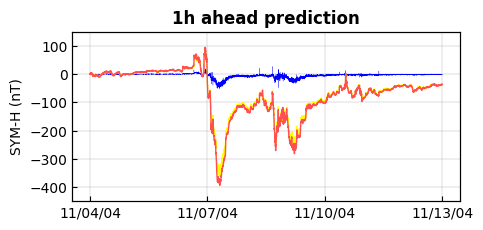

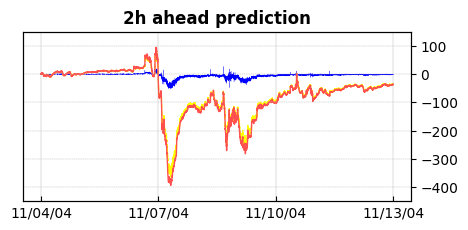

In [9]:
storm_to_test = 37  # storm number 37
start_hour = 1  # 1-hour ahead
end_hour = 2  # 2-hour ahead
resolution_minutes = 1  # resolution
do_pred_error = True  # perform prediction error True|False
view_type = ""  # locatization type: '_lv' means focus on local view (peak storm time), '' (blank) full range
x_test_37, y_test_37, predictions_ft_37, x_dates_37, names_37 = test(
    storm_to_test,
    start_hour,
    end_hour + 1,
    resolution_minutes=resolution_minutes,
    do_pred_error=do_pred_error,
    view_type=view_type,
)

The columns_names are defined in the SYMHnet_utils.py file
Here we can see that the By and Bz components of the used both in the GSE and GSM coordinates, which is not specified in the paper
Moreover, the Bx was not supposed to be an input feature, according to the text and figures 1 and 2 from the paper

In [10]:
display(columns_names)

['Field_magnitude_average',
 'BX_GSE_GSM',
 'BY_GSE',
 'BZ_GSE',
 'BY_GSM',
 'BZ_GSM',
 'Speed',
 'Proton_Density',
 'Flow_pressure',
 'Electric_field',
 'SYM_H']

Here we plot the output of the network for the first forecast, which corresponds to the 1 hour ahead forecast for the storm 37 using the 1 minute resolution data

As the labels we use the ``y_test``, we also plot the SYM-H of the input data, in magenta but is completetly overlapped.
For the predictions we plot them using yellow and the prediction error of the labels and predictions in blue.

The figure is almost identical to the bottom left subplot of the Figure 3 in the paper. However, the dates are correct here.

In [11]:
display(f'Print the shape of the input data, labels and predictions so we know how to handle them later')
display(f'Input data for the 1 hour ahead: {x_test_37[0].shape}, that is {x_test_37[0].shape[0]} batches of {x_test_37[0].shape[1]} timesteps of {x_test_37[0].shape[2]} features')
display(f'Considering that is only one time-step we can concatenate them directly, if it were more than one timestep, '
        f'as with normal time-series forecasting models, we would only use the last input SYM-H of the sequence, but this '
        f'is not the case')
display(f'Labels data: {y_test_37[0].shape}, that is {x_test_37[0].shape[0]} single values')
display(f'Predictions: {len(predictions_ft_37[0])} arrays')
display(f'The first array is the mean of the 100 runs from the MC dropout sampling {predictions_ft_37[0][0].shape} (same length as the input or labels)')
display(f'The second one is the single value of the aleatoric uncertainty {predictions_ft_37[0][1]}')
display(f'The third one one is the single value of the epistemic uncertainty {predictions_ft_37[0][2]}')
display(f'The last one one is all the outputs from the MC dropout sampling {predictions_ft_37[0][3].shape} (100 batches of {predictions_ft_37[0][3].shape[1]} sampes)')
display(f'We use the mea of the 100 runs of the MC dropout sampling, that is the first array of the predictions, similar to the original repository')

'Print the shape of the input data, labels and predictions so we know how to handle them later'

'Input data for the 1 hour ahead: (13785, 1, 11, 1), that is 13785 batches of 1 timesteps of 11 features'

'Considering that is only one time-step we can concatenate them directly, if it were more than one timestep, as with normal time-series forecasting models, we would only use the last input SYM-H of the sequence, but this is not the case'

'Labels data: (13785,), that is 13785 single values'

'Predictions: 4 arrays'

'The first array is the mean of the 100 runs from the MC dropout sampling (13785,) (same length as the input or labels)'

'The second one is the single value of the aleatoric uncertainty 31.62379264831543'

'The third one one is the single value of the epistemic uncertainty 10.604375839233398'

'The last one one is all the outputs from the MC dropout sampling (100, 13785) (100 batches of 13785 sampes)'

'We use the mea of the 100 runs of the MC dropout sampling, that is the first array of the predictions, similar to the original repository'

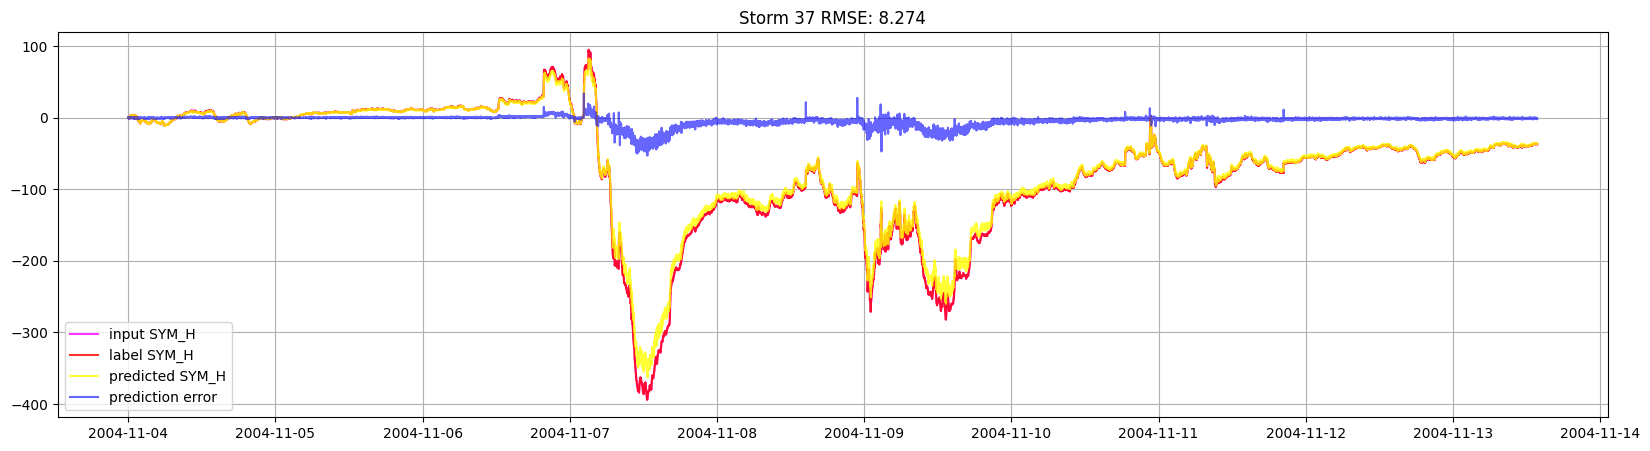

In [12]:
# Create a dataframe with the input data that is supplied to the network
input_data = pd.DataFrame(data = np.squeeze(x_test_37[0]), columns = columns_names, index = x_dates_37[0])
# Create a dataframe with the labels (real values)
labels = pd.DataFrame(data = y_test_37[0], columns = ['SYM_H'], index = x_dates_37[0])
# Create a dataframe with the predictions made by the network using the input data
predictions = pd.DataFrame(data = predictions_ft_37[0][0], columns = ['SYM_H'], index = x_dates_37[0])

# Prepare the plot
fig, ax = plt.subplots(1, 1, figsize = (20, 5))
# Plot the input data in magenta
ax.plot(input_data.index, input_data['SYM_H'], color = 'magenta', label = 'input SYM_H', alpha = 0.8)
# Plot the labels in red
ax.plot(labels.index, labels['SYM_H'], color = 'red', label = 'label SYM_H', alpha = 0.8)
# Plot the predictions in yellow
ax.plot(predictions.index, predictions['SYM_H'], color = 'yellow', label = 'predicted SYM_H', alpha = 0.8)
# Plot the prediction error (labels - predictions) in blue
ax.plot(predictions.index, labels['SYM_H'] - predictions['SYM_H'], color = 'blue', label = 'prediction error', alpha = 0.6)

rmse = msem(labels['SYM_H'], predictions['SYM_H'], squared = False)

# Set the RMSE of the predictions as the title of the plot
ax.set_title(f'Storm 37 RMSE: {rmse:.3f}')

ax.grid(True)
ax.legend()

plt.show();

Here, we compare the input SYM-H, the labels and the predictions.
As we can see, the labels are just the input SYM_H displaced one single time-step.

Moreover we print the RMSE of a simulated persistence, comparing the input SYM-H to the real values and the RMSE of the predictions compared to the labels, the persistence model performs significantly better.

In [13]:
# Create a joint dataframe merging the input, labels, and predictions
joint_df = pd.DataFrame(index = input_data.index)
# Align the inputs, labels and predictions
joint_df['input SYM_H'] = input_data['SYM_H']
joint_df['labels SYM_H'] = labels['SYM_H']
joint_df['predictions SYM_H'] = predictions['SYM_H']

# Print the first 50 lines of the dataframe
display(joint_df.head(50))

# Calculate the RMSE of the persistence model (input compared to the labels)
rmse_persistence = msem(labels['SYM_H'], input_data['SYM_H'], squared = False)
# Calculate the RMSE of the predictions (predictions compared to the labels)
rmse_predictions = msem(labels['SYM_H'], predictions['SYM_H'], squared = False)
display(f'RMSE predictions: {rmse_predictions:.5f}')
display(f'RMSE persistence: {rmse_persistence:.5f}')

,input SYM_H,labels SYM_H,predictions SYM_H
2004-11-04 00:00:00,0.0,0.0,0.042763
2004-11-04 00:01:00,0.0,0.0,0.074836
2004-11-04 00:02:00,0.0,1.0,0.111309
2004-11-04 00:03:00,1.0,1.0,1.165290
2004-11-04 00:04:00,1.0,0.0,1.192186
2004-11-04 00:05:00,0.0,0.0,0.061352
2004-11-04 00:06:00,0.0,0.0,0.080535
2004-11-04 00:07:00,0.0,0.0,0.058181
2004-11-04 00:08:00,0.0,0.0,0.042101
2004-11-04 00:09:00,0.0,-1.0,0.097484


'RMSE predictions: 8.27369'

'RMSE persistence: 1.49939'

Similar to before, we compare the data from the 2 hours ahead forecast. In this case we can see that the difference between the input data and the labels is still only one time-step, being the persistence RMSE identical but the RMSE of the model slightly higher. This can also explain why in the paper the metrics for the 1 hour ahead and the 2 hours ahead forecasts are closer than all the compared models.

'Input data for the 2 hour ahead: (13785, 1, 11, 1), that is 13785 batches of 1 timesteps of 11 features'

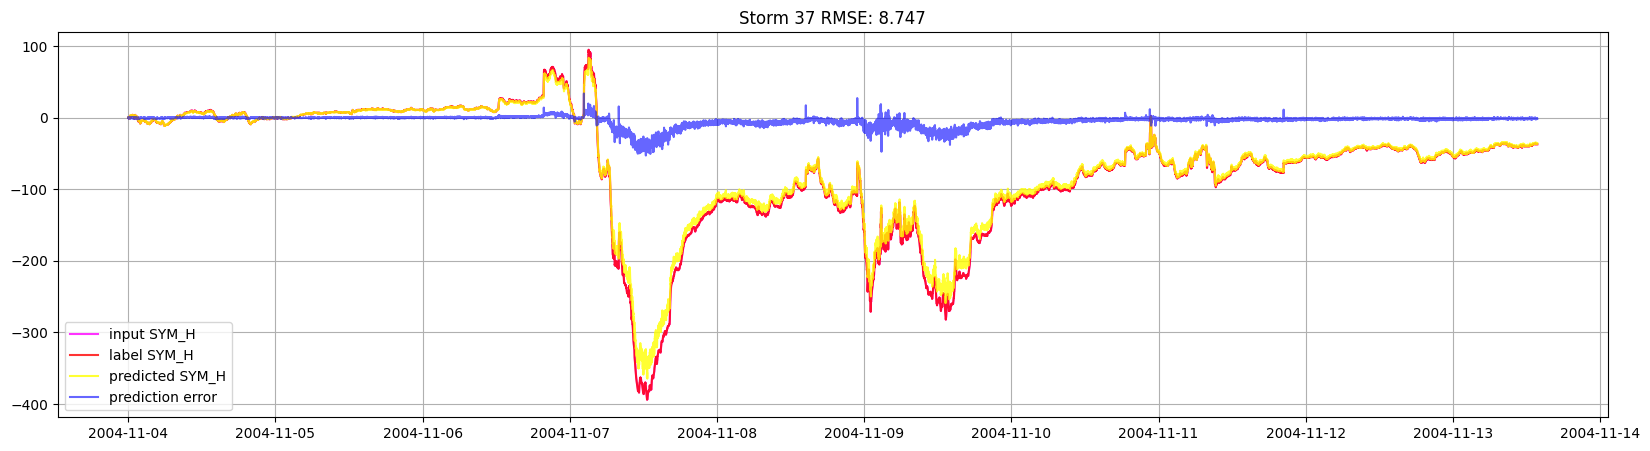

In [14]:
display(f'Input data for the 2 hour ahead: {x_test_37[1].shape}, that is {x_test_37[1].shape[0]} batches of {x_test_37[1].shape[1]} timesteps of {x_test_37[1].shape[2]} features')
# Create a dataframe with the input data that is supplied to the network
input_data = pd.DataFrame(data = np.squeeze(x_test_37[1]), columns = columns_names, index = x_dates_37[1])
# Create a dataframe with the labels (real values)
labels = pd.DataFrame(data = y_test_37[1], columns = ['SYM_H'], index = x_dates_37[1])
# Create a dataframe with the predictions made by the network using the input data
predictions = pd.DataFrame(data = predictions_ft_37[1][0], columns = ['SYM_H'], index = x_dates_37[1])


# Prepare the plot
fig, ax = plt.subplots(1, 1, figsize = (20, 5))
# Plot the input data in magenta
ax.plot(input_data.index, input_data['SYM_H'], color = 'magenta', label = 'input SYM_H', alpha = 0.8)
# Plot the labels in red
ax.plot(labels.index, labels['SYM_H'], color = 'red', label = 'label SYM_H', alpha = 0.8)
# Plot the predictions in yellow
ax.plot(predictions.index, predictions['SYM_H'], color = 'yellow', label = 'predicted SYM_H', alpha = 0.8)
# Plot the prediction error (labels - predictions) in blue
ax.plot(predictions.index, labels['SYM_H'] - predictions['SYM_H'], color = 'blue', label = 'prediction error', alpha = 0.6)

rmse = msem(labels['SYM_H'], predictions['SYM_H'], squared = False)

# Set the RMSE of the predictions as the title of the plot
ax.set_title(f'Storm 37 RMSE: {rmse:.3f}')

ax.grid(True)
ax.legend()

plt.show();

In [15]:
# Create a joint dataframe merging the input, labels, and predictions
joint_df = pd.DataFrame(index = input_data.index)
# Align the inputs, labels and predictions
joint_df['input SYM_H'] = input_data['SYM_H']
joint_df['labels SYM_H'] = labels['SYM_H']
joint_df['predictions SYM_H'] = predictions['SYM_H']

# Print the first 50 lines of the dataframe
display(joint_df.head(50))

# Calculate the RMSE of the persistence model (input compared to the labels)
rmse_persistence = msem(labels['SYM_H'], input_data['SYM_H'], squared = False)
# Calculate the RMSE of the predictions (predictions compared to the labels)
rmse_predictions = msem(labels['SYM_H'], predictions['SYM_H'], squared = False)
display(f'RMSE predictions: {rmse_predictions:.5f}')
display(f'RMSE persistence: {rmse_persistence:.5f}')

,input SYM_H,labels SYM_H,predictions SYM_H
2004-11-04 00:00:00,0.0,0.0,0.077408
2004-11-04 00:01:00,0.0,0.0,0.053528
2004-11-04 00:02:00,0.0,1.0,0.106341
2004-11-04 00:03:00,1.0,1.0,1.178906
2004-11-04 00:04:00,1.0,0.0,1.136213
2004-11-04 00:05:00,0.0,0.0,0.074784
2004-11-04 00:06:00,0.0,0.0,0.070225
2004-11-04 00:07:00,0.0,0.0,0.032064
2004-11-04 00:08:00,0.0,0.0,0.058145
2004-11-04 00:09:00,0.0,-1.0,0.101628


'RMSE predictions: 8.74704'

'RMSE persistence: 1.49939'

Now we perform the forecast of the same storm but using the 5-minute resolution data

'Starting the training for start_hour:'

1

'end_hour:'

3

'test_range:'

['1998-11-10-',
 '1998-11-11-',
 '1998-11-12-',
 '1998-11-2-',
 '1998-11-3-',
 '1998-11-4-',
 '1998-11-5-',
 '1998-11-6-',
 '1998-11-7-',
 '1998-11-8-',
 '1998-11-9-',
 '1998-6-22-',
 '1998-6-23-',
 '1998-6-24-',
 '1998-6-25-',
 '1998-6-26-',
 '1998-6-27-',
 '1998-6-28-',
 '1998-6-29-',
 '1998-6-30-',
 '1999-1-10-',
 '1999-1-11-',
 '1999-1-12-',
 '1999-1-13-',
 '1999-1-14-',
 '1999-1-15-',
 '1999-1-16-',
 '1999-1-17-',
 '1999-1-18-',
 '1999-1-9-',
 '1999-4-13-',
 '1999-4-14-',
 '1999-4-15-',
 '1999-4-16-',
 '1999-4-17-',
 '1999-4-18-',
 '1999-4-19-',
 '2000-1-16-',
 '2000-1-17-',
 '2000-1-18-',
 '2000-1-19-',
 '2000-1-20-',
 '2000-1-21-',
 '2000-1-22-',
 '2000-1-23-',
 '2000-1-24-',
 '2000-1-25-',
 '2000-1-26-',
 '2000-4-10-',
 '2000-4-11-',
 '2000-4-12-',
 '2000-4-2-',
 '2000-4-3-',
 '2000-4-4-',
 '2000-4-5-',
 '2000-4-6-',
 '2000-4-7-',
 '2000-4-8-',
 '2000-4-9-',
 '2000-5-19-',
 '2000-5-20-',
 '2000-5-21-',
 '2000-5-22-',
 '2000-5-23-',
 '2000-5-24-',
 '2000-5-25-',
 '2000-5-26-',
 

'test_years:'

[1998, 1999, 2000, 2001, 2003, 2004, 2012, 2013, 2015, 2018]

'Running testing for storm #37 for '

'1-hour ahead for'

'5-minute resolution'

'len(train_data):'

71735

'len(train_array):'

71735

'Loading model at models_storms_5min/1h_symh/model_weights_full'

't1'

'2004-11-4'

'values-->'

'2004-11-04'

'2004-11-4'

'2004-11-14'

'2004-11-14'

'value:'

['2004-11-4-',
 '2004-11-5-',
 '2004-11-6-',
 '2004-11-7-',
 '2004-11-8-',
 '2004-11-9-',
 '2004-11-10-',
 '2004-11-11-',
 '2004-11-12-',
 '2004-11-13-',
 '2004-11-14-']

'value 2:'

['2004-11-4-',
 '2004-11-5-',
 '2004-11-6-',
 '2004-11-7-',
 '2004-11-8-',
 '2004-11-9-',
 '2004-11-10-',
 '2004-11-11-',
 '2004-11-12-',
 '2004-11-13-',
 '2004-11-14-']

37

'storms_data size:'

3049

's_data size:'

3049

37

'min:'

-393

'max:'

92

37

'range:'

['2004-11-4-',
 '2004-11-5-',
 '2004-11-6-',
 '2004-11-7-',
 '2004-11-8-',
 '2004-11-9-',
 '2004-11-10-',
 '2004-11-11-',
 '2004-11-12-',
 '2004-11-13-',
 '2004-11-14-']

'end_date_ts:'

datetime.datetime(2004, 11, 14, 13, 55)

'saving to:'

'MOD_results_datasets/storm_num_37/5min/1h_uq_training.csv'

'dates-->'

datetime.datetime(2004, 11, 4, 0, 0)

datetime.datetime(2004, 11, 6, 15, 30)

datetime.datetime(2004, 11, 9, 7, 0)

datetime.datetime(2004, 11, 14, 13, 55)

'Preds stats -->'

37

'5min'

1

34

-68

'xticks in test:'

[datetime.datetime(2004, 11, 4, 0, 0),
 datetime.datetime(2004, 11, 7, 12, 40),
 datetime.datetime(2004, 11, 11, 1, 20),
 datetime.datetime(2004, 11, 14, 13, 55)]

'Running testing for storm #37 for '

'2-hour ahead for'

'5-minute resolution'

'len(train_data):'

71735

'len(train_array):'

71735

'Loading model at models_storms_5min/2h_symh/model_weights_full'

't1'

'2004-11-4'

'values-->'

'2004-11-04'

'2004-11-4'

'2004-11-14'

'2004-11-14'

'value:'

['2004-11-4-',
 '2004-11-5-',
 '2004-11-6-',
 '2004-11-7-',
 '2004-11-8-',
 '2004-11-9-',
 '2004-11-10-',
 '2004-11-11-',
 '2004-11-12-',
 '2004-11-13-',
 '2004-11-14-']

'value 2:'

['2004-11-4-',
 '2004-11-5-',
 '2004-11-6-',
 '2004-11-7-',
 '2004-11-8-',
 '2004-11-9-',
 '2004-11-10-',
 '2004-11-11-',
 '2004-11-12-',
 '2004-11-13-',
 '2004-11-14-']

37

'storms_data size:'

3049

's_data size:'

3049

37

'min:'

-393

'max:'

92

37

'range:'

['2004-11-4-',
 '2004-11-5-',
 '2004-11-6-',
 '2004-11-7-',
 '2004-11-8-',
 '2004-11-9-',
 '2004-11-10-',
 '2004-11-11-',
 '2004-11-12-',
 '2004-11-13-',
 '2004-11-14-']

'end_date_ts:'

datetime.datetime(2004, 11, 14, 13, 55)

'saving to:'

'MOD_results_datasets/storm_num_37/5min/2h_uq_training.csv'

'dates-->'

datetime.datetime(2004, 11, 4, 0, 0)

datetime.datetime(2004, 11, 6, 15, 30)

datetime.datetime(2004, 11, 9, 7, 0)

datetime.datetime(2004, 11, 14, 13, 55)

'Preds stats -->'

37

'5min'

2

34

-79

'xticks in test:'

[datetime.datetime(2004, 11, 4, 0, 0),
 datetime.datetime(2004, 11, 7, 12, 40),
 datetime.datetime(2004, 11, 11, 1, 20),
 datetime.datetime(2004, 11, 14, 13, 55)]

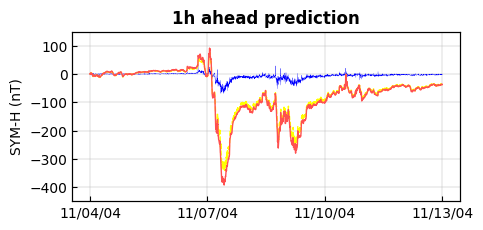

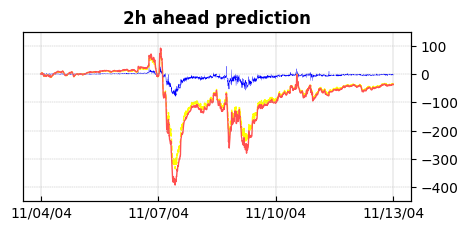

In [16]:
storm_to_test = 37  # storm number 37
start_hour = 1  # 1-hour ahead
end_hour = 2  # 2-hour ahead
resolution_minutes = 5  # resolution
do_pred_error = True  # perform prediction error True|False
view_type = ""  # locatization type: '_lv' means focus on local view (peak storm time), '' (blank) full range
x_test_37, y_test_37, predictions_ft_37, x_dates_37, names_37 = test(
    storm_to_test,
    start_hour,
    end_hour + 1,
    resolution_minutes=resolution_minutes,
    do_pred_error=do_pred_error,
    view_type=view_type,
)

In [17]:
display(f'Print the shape of the input data, labels and predictions so we know how to handle them later')
display(f'Input data for the 1 hour ahead: {x_test_37[0].shape}, that is {x_test_37[0].shape[0]} batches of {x_test_37[0].shape[1]} timesteps of {x_test_37[0].shape[2]} features')
display(f'Considering that is only one time-step we can concatenate them directly, if it were more than one timestep, '
        f'as with normal time-series forecasting models, we would only use the last input SYM-H of the sequence, but this '
        f'is not the case')
display(f'Labels data: {y_test_37[0].shape}, that is {x_test_37[0].shape[0]} single values')
display(f'Predictions: {len(predictions_ft_37[0])} arrays')
display(f'The first array is the mean of the 100 runs from the MC dropout sampling {predictions_ft_37[0][0].shape} (same length as the input or labels)')
display(f'The second one is the single value of the aleatoric uncertainty {predictions_ft_37[0][1]}')
display(f'The third one one is the single value of the epistemic uncertainty {predictions_ft_37[0][2]}')
display(f'The last one one is all the outputs from the MC dropout sampling {predictions_ft_37[0][3].shape} (100 batches of {predictions_ft_37[0][3].shape[1]} sampes)')
display(f'We use the mea of the 100 runs of the MC dropout sampling, that is the first array of the predictions, similar to the original repository')

'Print the shape of the input data, labels and predictions so we know how to handle them later'

'Input data for the 1 hour ahead: (3048, 1, 11, 1), that is 3048 batches of 1 timesteps of 11 features'

'Considering that is only one time-step we can concatenate them directly, if it were more than one timestep, as with normal time-series forecasting models, we would only use the last input SYM-H of the sequence, but this is not the case'

'Labels data: (3048,), that is 3048 single values'

'Predictions: 4 arrays'

'The first array is the mean of the 100 runs from the MC dropout sampling (3048,) (same length as the input or labels)'

'The second one is the single value of the aleatoric uncertainty 36.539485931396484'

'The third one one is the single value of the epistemic uncertainty 16.090354919433594'

'The last one one is all the outputs from the MC dropout sampling (100, 3048) (100 batches of 3048 sampes)'

'We use the mea of the 100 runs of the MC dropout sampling, that is the first array of the predictions, similar to the original repository'

'Input data for the 1 hour ahead: (3048, 1, 11, 1), that is 3048 batches of 1 timesteps of 11 features'

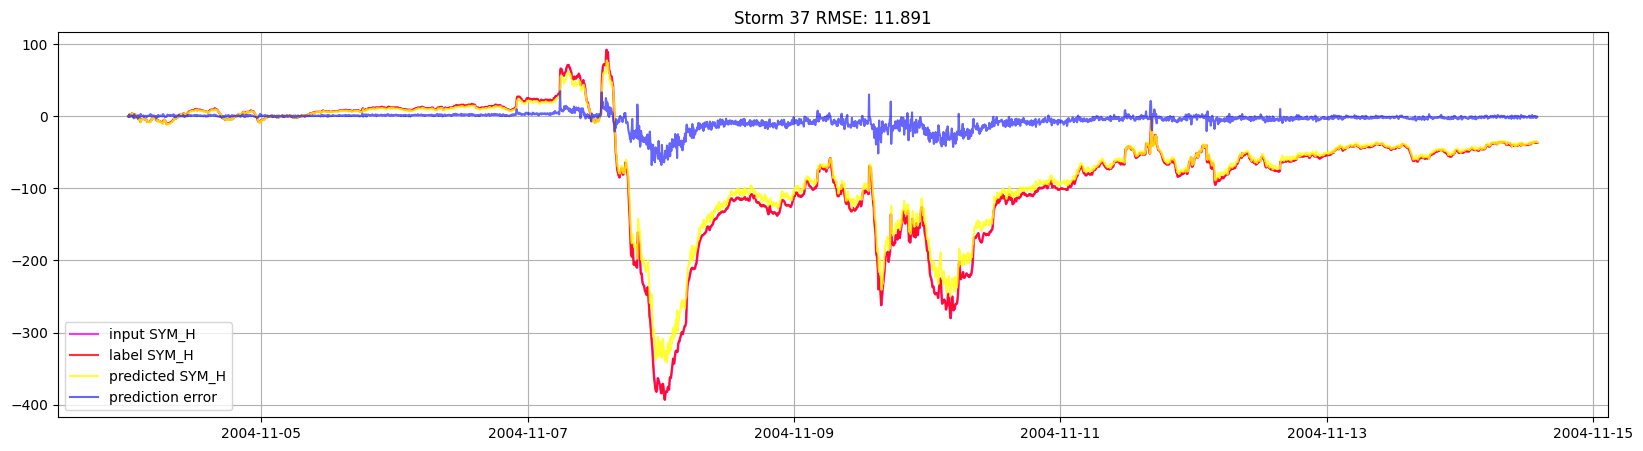

In [18]:
display(f'Input data for the 1 hour ahead: {x_test_37[0].shape}, that is {x_test_37[0].shape[0]} batches of {x_test_37[0].shape[1]} timesteps of {x_test_37[0].shape[2]} features')
# Create a dataframe with the input data that is supplied to the network
input_data = pd.DataFrame(data = np.squeeze(x_test_37[0]), columns = columns_names, index = x_dates_37[0])
# Create a dataframe with the labels (real values)
labels = pd.DataFrame(data = y_test_37[0], columns = ['SYM_H'], index = x_dates_37[0])
# Create a dataframe with the predictions made by the network using the input data
predictions = pd.DataFrame(data = predictions_ft_37[0][0], columns = ['SYM_H'], index = x_dates_37[0])

# Prepare the plot
fig, ax = plt.subplots(1, 1, figsize = (20, 5))
# Plot the input data in magenta
ax.plot(input_data.index, input_data['SYM_H'], color = 'magenta', label = 'input SYM_H', alpha = 0.8)
# Plot the labels in red
ax.plot(labels.index, labels['SYM_H'], color = 'red', label = 'label SYM_H', alpha = 0.8)
# Plot the predictions in yellow
ax.plot(predictions.index, predictions['SYM_H'], color = 'yellow', label = 'predicted SYM_H', alpha = 0.8)
# Plot the prediction error (labels - predictions) in blue
ax.plot(predictions.index, labels['SYM_H'] - predictions['SYM_H'], color = 'blue', label = 'prediction error', alpha = 0.6)

rmse = msem(labels['SYM_H'], predictions['SYM_H'], squared = False)

# Set the RMSE of the predictions as the title of the plot
ax.set_title(f'Storm 37 RMSE: {rmse:.3f}')

ax.grid(True)
ax.legend()

plt.show();

In this case, the difference between the input and the label is also one single time-step, but since we are working with 5-minute data, the persistence RMSE is much higher than the next minute, as is the RMSE of the model. However, the persistence model has still more than 3 times lower RMSE.

In [19]:
# Create a joint dataframe merging the input, labels, and predictions
joint_df = pd.DataFrame(index = input_data.index)
# Align the inputs, labels and predictions
joint_df['input SYM_H'] = input_data['SYM_H']
joint_df['labels SYM_H'] = labels['SYM_H']
joint_df['predictions SYM_H'] = predictions['SYM_H']

# Print the first 50 lines of the dataframe
display(joint_df.head(50))

# Calculate the RMSE of the persistence model (input compared to the labels)
rmse_persistence = msem(labels['SYM_H'], input_data['SYM_H'], squared = False)
# Calculate the RMSE of the predictions (predictions compared to the labels)
rmse_predictions = msem(labels['SYM_H'], predictions['SYM_H'], squared = False)
display(f'RMSE predictions: {rmse_predictions:.5f}')
display(f'RMSE persistence: {rmse_persistence:.5f}')

,input SYM_H,labels SYM_H,predictions SYM_H
2004-11-04 00:00:00,0.0,0.0,0.124750
2004-11-04 00:05:00,0.0,-1.0,0.158533
2004-11-04 00:10:00,-1.0,1.0,-0.720972
2004-11-04 00:15:00,1.0,3.0,1.134746
2004-11-04 00:20:00,3.0,2.0,2.929216
2004-11-04 00:25:00,2.0,2.0,1.964185
2004-11-04 00:30:00,2.0,2.0,2.042728
2004-11-04 00:35:00,2.0,3.0,2.198373
2004-11-04 00:40:00,3.0,4.0,3.168563
2004-11-04 00:45:00,4.0,3.0,3.936562


'RMSE predictions: 11.89093'

'RMSE persistence: 3.55833'

For the two hours ahead forecast, the same happens, the difference between the label and the input is only one time-step, which causes the persistence to be the same while the RMSE predictions increase.

'Input data for the 2 hour ahead: (3048, 1, 11, 1), that is 3048 batches of 1 timesteps of 11 features'

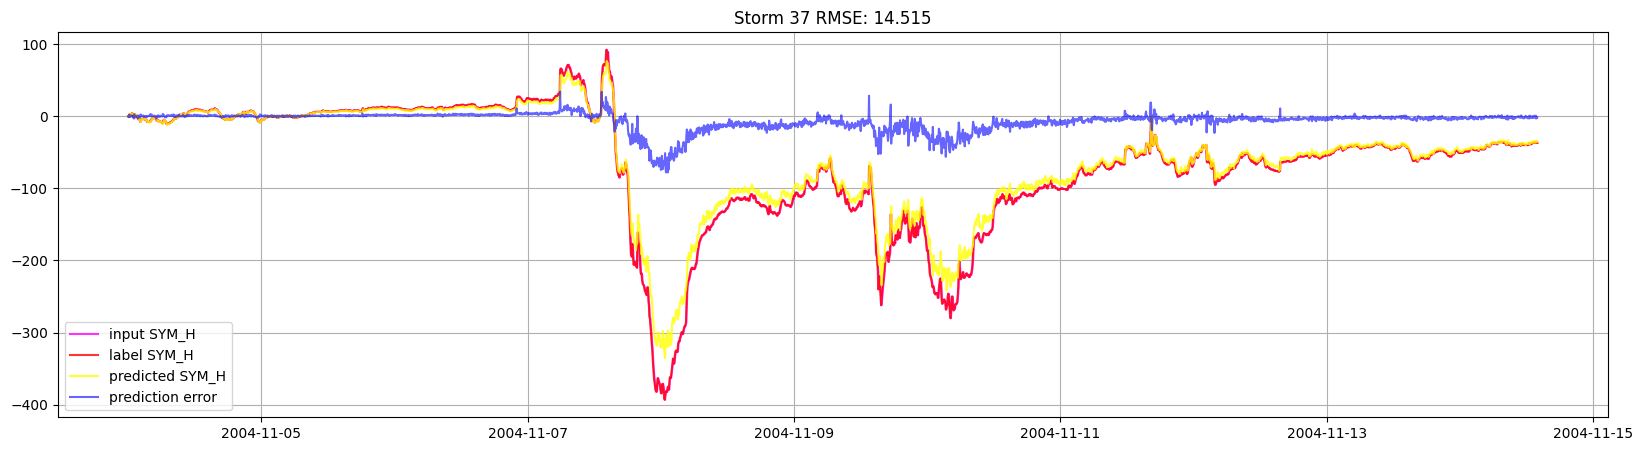

In [20]:
display(f'Input data for the 2 hour ahead: {x_test_37[1].shape}, that is {x_test_37[1].shape[0]} batches of {x_test_37[1].shape[1]} timesteps of {x_test_37[1].shape[2]} features')
# Create a dataframe with the input data that is supplied to the network
input_data = pd.DataFrame(data = np.squeeze(x_test_37[1]), columns = columns_names, index = x_dates_37[1])
# Create a dataframe with the labels (real values)
labels = pd.DataFrame(data = y_test_37[1], columns = ['SYM_H'], index = x_dates_37[1])
# Create a dataframe with the predictions made by the network using the input data
predictions = pd.DataFrame(data = predictions_ft_37[1][0], columns = ['SYM_H'], index = x_dates_37[1])

# Prepare the plot
fig, ax = plt.subplots(1, 1, figsize = (20, 5))
# Plot the input data in magenta
ax.plot(input_data.index, input_data['SYM_H'], color = 'magenta', label = 'input SYM_H', alpha = 0.8)
# Plot the labels in red
ax.plot(labels.index, labels['SYM_H'], color = 'red', label = 'label SYM_H', alpha = 0.8)
# Plot the predictions in yellow
ax.plot(predictions.index, predictions['SYM_H'], color = 'yellow', label = 'predicted SYM_H', alpha = 0.8)
# Plot the prediction error (labels - predictions) in blue
ax.plot(predictions.index, labels['SYM_H'] - predictions['SYM_H'], color = 'blue', label = 'prediction error', alpha = 0.6)

rmse = msem(labels['SYM_H'], predictions['SYM_H'], squared = False)

# Set the RMSE of the predictions as the title of the plot
ax.set_title(f'Storm 37 RMSE: {rmse:.3f}')

ax.grid(True)
ax.legend()

plt.show();

In [21]:
# Create a joint dataframe merging the input, labels, and predictions
joint_df = pd.DataFrame(index = input_data.index)
# Align the inputs, labels and predictions
joint_df['input SYM_H'] = input_data['SYM_H']
joint_df['labels SYM_H'] = labels['SYM_H']
joint_df['predictions SYM_H'] = predictions['SYM_H']

# Print the first 50 lines of the dataframe
display(joint_df.head(50))

# Calculate the RMSE of the persistence model (input compared to the labels)
rmse_persistence = msem(labels['SYM_H'], input_data['SYM_H'], squared = False)
# Calculate the RMSE of the predictions (predictions compared to the labels)
rmse_predictions = msem(labels['SYM_H'], predictions['SYM_H'], squared = False)
display(f'RMSE predictions: {rmse_predictions:.5f}')
display(f'RMSE persistence: {rmse_persistence:.5f}')

,input SYM_H,labels SYM_H,predictions SYM_H
2004-11-04 00:00:00,0.0,0.0,0.224064
2004-11-04 00:05:00,0.0,-1.0,0.288803
2004-11-04 00:10:00,-1.0,1.0,-0.728131
2004-11-04 00:15:00,1.0,3.0,1.164014
2004-11-04 00:20:00,3.0,2.0,3.015395
2004-11-04 00:25:00,2.0,2.0,2.011204
2004-11-04 00:30:00,2.0,2.0,2.111770
2004-11-04 00:35:00,2.0,3.0,2.076197
2004-11-04 00:40:00,3.0,4.0,3.139544
2004-11-04 00:45:00,4.0,3.0,3.621007


'RMSE predictions: 14.51545'

'RMSE persistence: 3.55833'

Zip the folder with the comment figures for the pdf

In [22]:
!zip -r comment_figures.zip comment_figures